<a href="https://colab.research.google.com/github/berrehalbadr/Applied-Data-Science-Course-in-the-Oil-and-Gas-Industry/blob/main/Course%20Notebooks/05-%20Story%20telling%20with%20data%20visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

# Applied Data Science in the Oil and Gas Industry 
## Tutorial 5: Story telling with data visualizations

---
### Badr Eddine Berrehal (Petroleum Engineer & Data Detective)
- **Email:** [berrehalbadr@gmail.com](berrehalbadr@gmail.com)
- **LinkedIn:** [Badr Berrehal](https://www.linkedin.com/in/badreddine-berrehal-a51010175)
- **Personal Web site:** [UDATA](https://sites.google.com/view/badreddine-berrehal/accueil)
- **GitHub:** [berrehalbadr](https://github.com/berrehalbadr)
- **License Type:** MIT license
---

# Notebook Content
- **What's this about**
- **A comprehensive guide for visualization**
    - Python plotting libraries
        - Matplotlib
        - Seaborn
        - Plotly
    - Visualization aspects using Python libs
        - Distribution
        - Correlation
        - Comparaison
        - Plotting refrences
- **Principals of effecient story telling through visuals**
    - How to successfully create a bad visualization
        - Scale truncation
        - Unecessary adds and overly crowded graphs
    - Guidelines of efficient visualizations
        - Understand the context
        - Choose an appropriate visual display
        - Eliminate clutter
        - Focus attention where you want it
        - Think like a designer
        - Tell a story
- **My personal visualization workflow** (*using Oil Pipelines Spill Accidents Data Set*)
    - Case based color palette and font setting
    - How I go about learning about the data
        - Investigating data types and missing values.
        - What is worst accident that accured in this period? What's the average cost of these accidents?
        - How does damage cost varie across categories?
        - What is the frequency of ('Liquid Type', 'Pipeline Type', 'Causes' and 'Locations' involved in these accidents)?
        - What is the geographic distribution of these spills and the magnitude of their net losses? (**Interactive Visual**)

# 1. What's this about
In the previous notebook `04- Data through the eyes of a statistician`, we explored the most commonly used statistical tools for efficient and unbiased investigation of data. Now we will turn to the most fun part of any machine learning or data analysis project, the creation of visualizations.

This notebook has two main goals: to introduce you to the different plotting libraries in Python, the different plots available and how to use them, and last but not least, we will take our visualization skills to the next level by introducing the principles of effective visualization and how to communicate a story through them.

Sounds cool right! I'll even share a sample of visualizations I provide my clients with in reports.

In [1]:
# Let's import the libs we need
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import gaussian_kde
import missingno as msno
from math import pi
import matplotlib.lines as lines
from pandas.plotting import parallel_coordinates

#Plotly libs
import plotly as py
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import iplot, init_notebook_mode

import warnings
warnings.filterwarnings("ignore")

In [2]:
# intall plotly
#!pip install plotly

___

# 2. Comprehensive guide for visualizations
In this section, I would like to present two main aspects:
1. The main libraries available in python for visualization.
2. The aspects usually investigated in any data related project.

**Note** that data analysis can be either **Exploratory** or **Explanatory**. In this section, we'll focus on data exploration commonly refered to as **EDA**, which means we'll move *fast and furious* just to understand the concept. Let's quick things up with the main libreries needed. Then we'll see how to employ them.

## 2.1 Python plotting libraries
There are many libraries with pre-packaged code for visualization, all we usually need to do is select the desired graph and define the data to plot. 

### 2.1.1 Matplotlib
1. We will start with the main Python library [Matplotlib](https://matplotlib.org/). Matplotlib is an amazing visualization library in Python for 2D plots of arrays. One of the greatest benefits of visualization is that it allows us visual access to huge amounts of data in easily digestible visuals. Matplotlib consists of several plots like line, bar, scatter, histogram etc. The best part is the degree of freedom in customization. You can do anything you want with a graphic, as long as you understand the basic components.
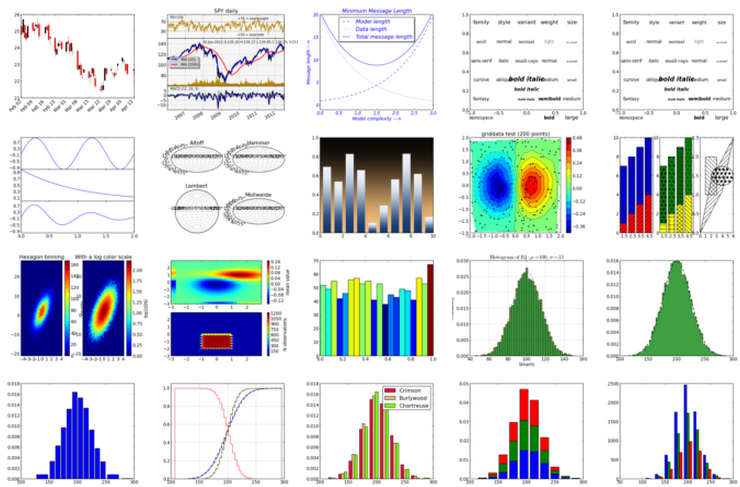

### 2.1.2 Seaborn
Second is [Seaborn](https://seaborn.pydata.org/#), the latter is an amazing Python visualization library built on top of **matplotlib**. It gives us the capability to create amplified data visuals. This helps us understand the data by displaying it in a visual context to unearth any hidden correlations between variables or trends that might not be obvious initially. Seaborn has a high-level interface as compared to the low level of Matplotlib. There are essentially a couple of (big) limitations in matplotlib that Seaborn fixes:
- Seaborn comes with a large number of high-level interfaces and customized themes that matplotlib lacks as it’s not easy to figure out the settings that make plots attractive
- Matplotlib functions don’t work well with dataframes, whereas seaborn does
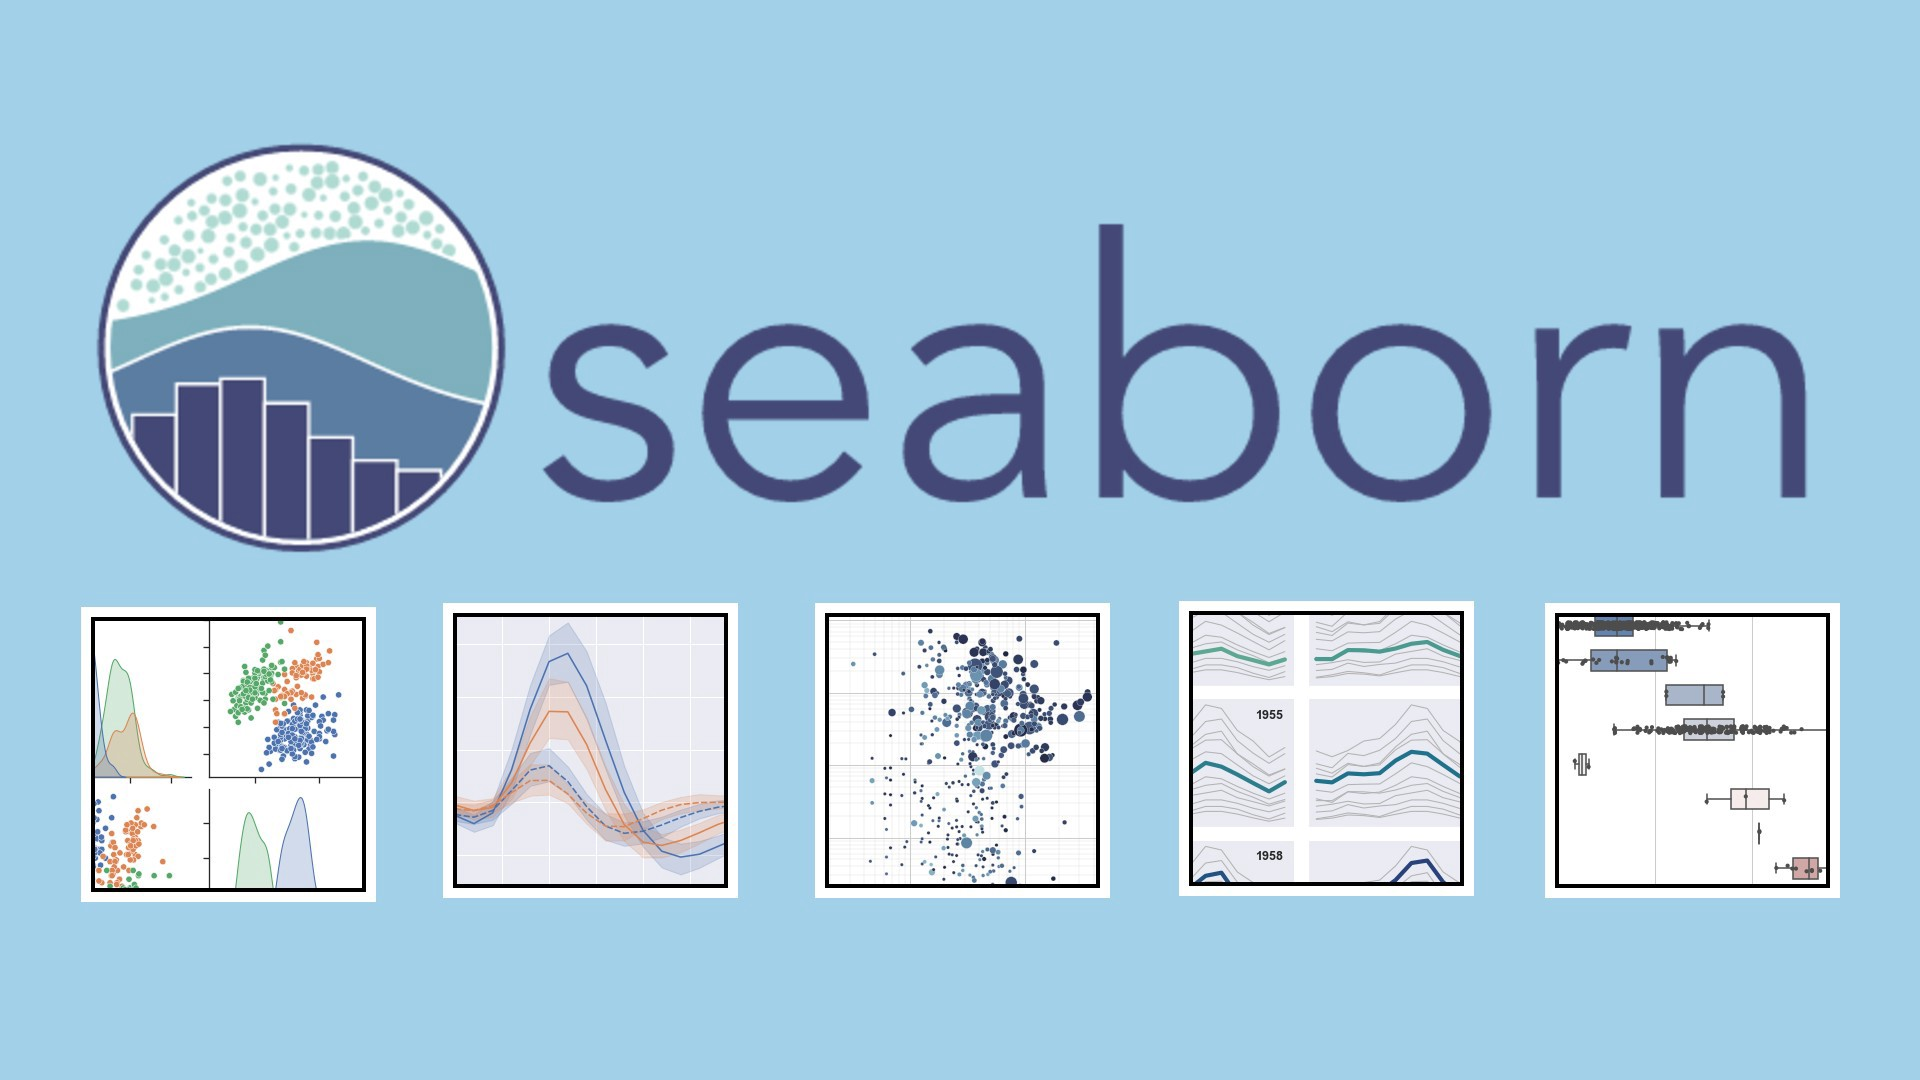

### 2.1.3 Plotly
Last but not least is [Plotly](https://plotly.com/python/). The Plotly Python library is an interactive open-source library. This can be a very helpful tool for data visualization and understanding the data simply and easily. It can plot various types of graphs and charts like scatter plots, line charts, bar charts, box plots, histograms, pie charts, etc. So you all must be wondering why plotly over other visualization tools or libraries? Here’s the answer:
- Plotly has hover tool capabilities that allow us to detect any outliers or anomalies in a large number of data points.
- It is visually attractive that can be accepted by a wide range of audiences.
- It allows us for the endless customization of our graphs that makes our - plot more meaningful and understandable for others.
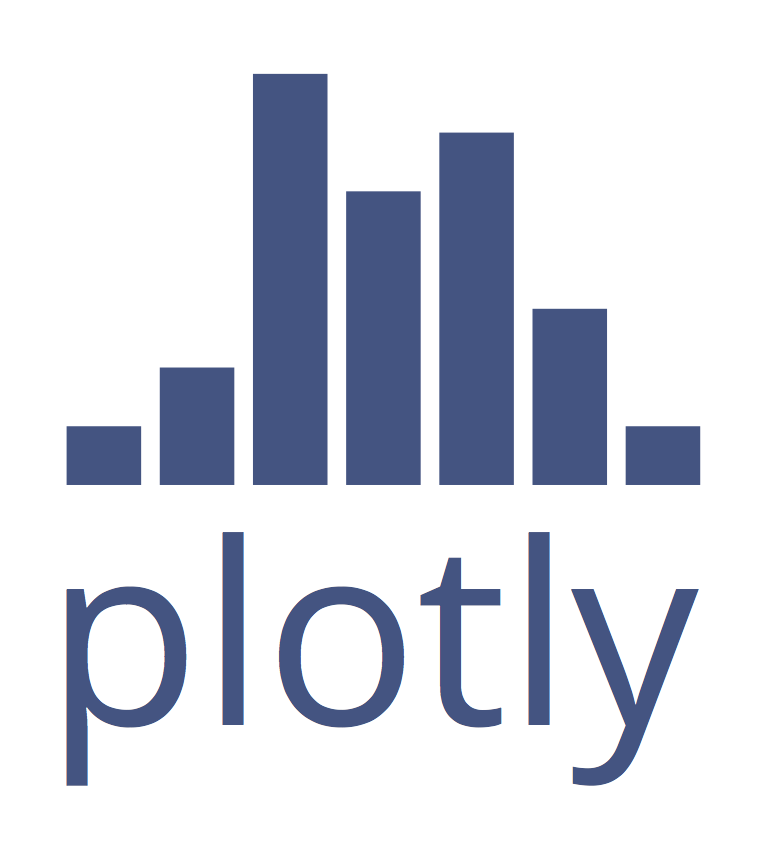


Personally, when it comes to reports, I like to combine **Matplotlib** and **Seaborn** with other minor libraries, but when I'm creating, say, dashboards or ppt's for live presentations, where some degree of interactivity is required, I might turn to **Plotly**.
Anyway, enough with the introductions, let's get to the real deal.


## 2.2 Visualization aspects
Visualizations are generally classified in terms of: 
1. The type of data they display, including **Numerical**, **Categorical**, a blend of both, **geographic**, etc. 
2. Or the functionality they serve, including **Distribution**, **Correlation**, **Comparison**, **Evolution**, etc.

Personally, I prefer to approach them from the second aspect, because it's relatively more convenient, and the data can actually be converted to other types quite easily. So what we'll do here is present each plot **Function** independently, and then see how to implement it using the libraries we presented earlier.

But not to overly clutter things up, we'll do Matplotlib and Seaborn, and leave Plotly for a final interactive part (since it's slightly advanced).

<div style="background-color:#FF7F7F; padding:30px; font-size:18px">
    <strong>Remarks: 
    </strong> The visuals used here are displayed in the most basic form possible, there is freedom for plenty of customization, which can be defined using attributes to specify style, colors, figure display, fonts, scales, etc. And we'll dive to those modifications in the <strong> Explanatory </strong> section.
   </div>

### 2.2.1 Distribution
We have already discussed some of these graphs in the previous notebook, now we will see how to put them into code and how to construct a general interpretation.
In a nutshell, the data distribution is the dispersion or variability of a specific parameter. Some of the main graphs that cover this aspect are **Histogram**, **Density**, **Boxplot**, and **Violon**. Let's get familiar with each one individually. 

#### 2.2.1.1 Histogram
A histogram takes as input a numeric variable only. The variable is cut into several bins, and the number of observation per bin is represented by the height of the bar. It is possible to represent the distribution of several variable on the same axis using this technique.

<AxesSubplot:>

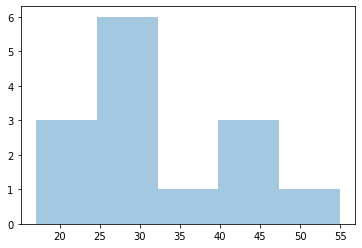

In [3]:
# Seaborn
# Let's put some data points
hours = [17, 20, 22, 25, 26, 27, 30, 31, 32, 38, 40, 40, 45, 55]

# Plot the histogram thanks to the distplot function
sns.distplot(a=hours, bins=5,  hist=True, kde=False, rug=False )

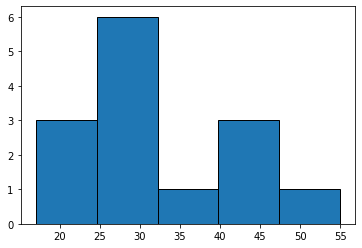

In [4]:
# Matplotlib
# Initialize layout
fig, ax = plt.subplots()

#plot
ax.hist(hours, bins=5, edgecolor="black")
plt.show()

#### 2.2.1.2 Density plot
A density plot shows the distribution of a numeric variable. It takes only numeric variables as input and is very close from an histogram. It can be use in the same exact condition.

Density plots are used to study the distribution of one or a few variables. Checking the distribution of your variables one by one is probably the first task you should do when you get a new dataset. It delivers a good quantity of information.

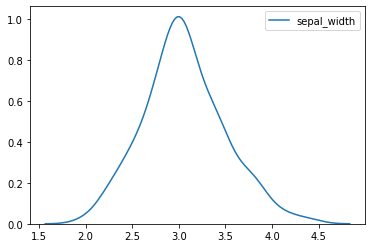

In [5]:
# Seaborn
# Import a built-in data set seaborn
df = sns.load_dataset('iris')
 
# Make default density plot
sns.kdeplot(df['sepal_width'])
plt.show()

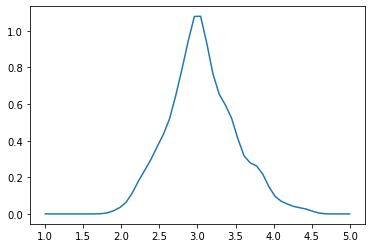

In [6]:
# Matplotlib
# Build a "density" function based on the dataset
# When you give a value from the X axis to this function, 
#it returns the according value on the Y axis

density = gaussian_kde(df['sepal_width'])
density.covariance_factor = lambda : .25
density._compute_covariance()

# Create a vector of 5 values
xs = np.linspace(1, 5)

# Set the figure
fig, ax= plt.subplots()

# Make the chart
ax.plot(xs,density(xs))
plt.show()

#### 2.2.1.3 Boxplot
A boxplot gives a nice summary of one or more numeric variables. A boxplot is composed of several elements:

- The line that divides the box into 2 parts represents the median of the data. If the median is 10, it means that there are the same number of data points below and above 10.
- The ends of the box shows the upper (Q3) and lower (Q1) quartiles. If the third quartile is 15, it means that 75% of the observation are lower than 15.
- The difference between Quartiles 1 and 3 is called the interquartile range (IQR)
- The extreme line shows (**Q3+ 1.5 x IQR**) to (**Q1- 1.5 x IQR**) (the highest and lowest value excluding outliers).
Dots (or other markers) beyond the extreme line shows potntial outliers.

Here is a diagram showing the boxplot anatomy:
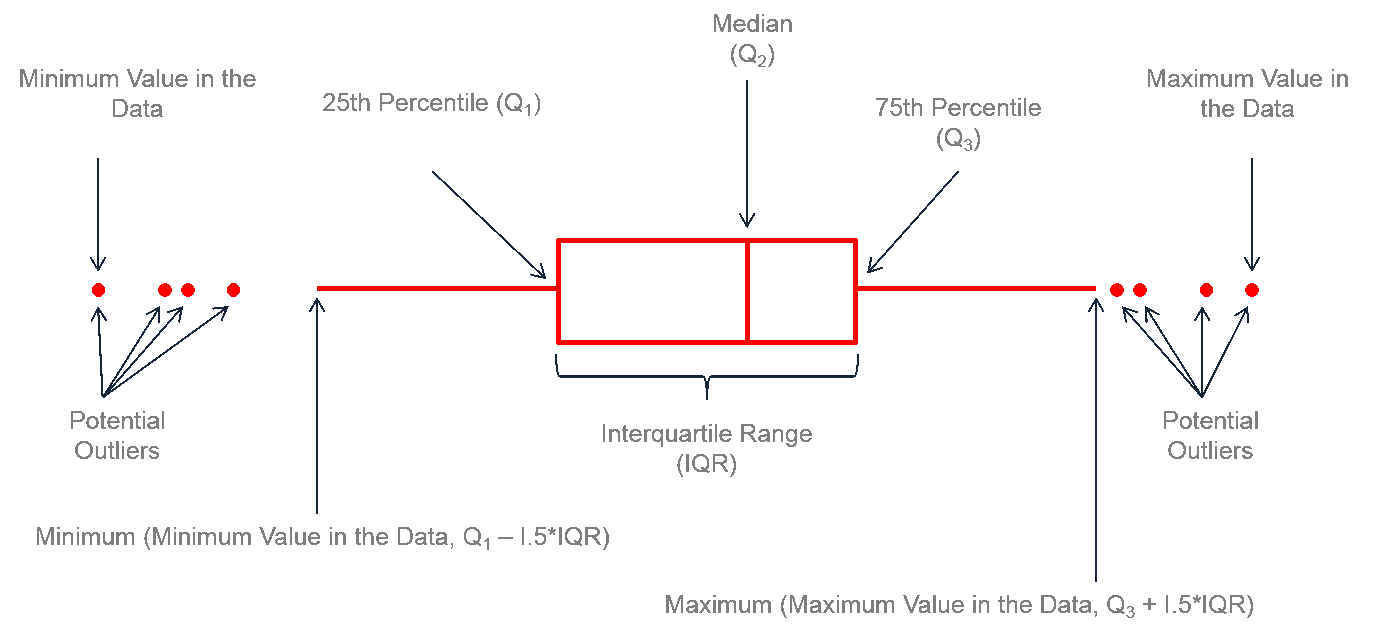

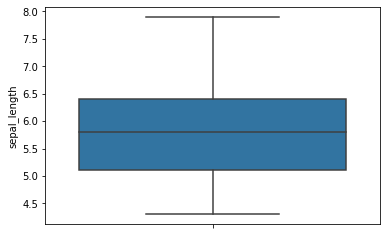

In [7]:
# Seaborn
sns.boxplot(y=df["sepal_length"])
plt.show()

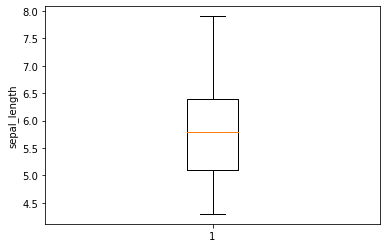

In [8]:
# Matplotlib
# Set the figure
fig, ax= plt.subplots()

# Make the chart
ax.boxplot(df["sepal_length"])
ax.set_ylabel('sepal_length')
plt.show()

#### 2.2.1.4 Voilin plot
Violin plot allows to visualize the distribution of a numeric variable for one or several groups. Each ‘violin’ represents a group or a variable. The shape represents the density estimate of the variable: the more data points in a specific range, the larger the violin is for that range. It is really close to a boxplot, but allows a deeper understanding of the distribution.

Violin plot is a powerful data visualization technique since it allows to compare both the ranking of several groups and their distribution. Surprisingly, it is less used than boxplot, even if it provides more information in my opinion.

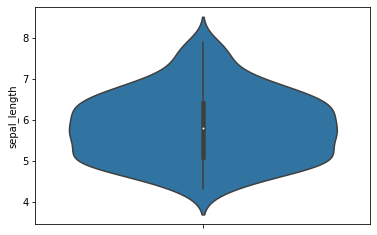

In [9]:
# Seaborn
# Make violin for one group only
sns.violinplot(y=df["sepal_length"])
plt.show()

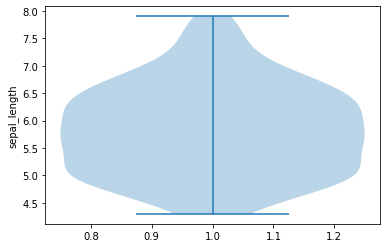

In [10]:
# Matplotlib
# Set the figure
fig, ax= plt.subplots()

# Make the chart
ax.violinplot(df["sepal_length"])
ax.set_ylabel('sepal_length')
plt.show()

### 2.2.2 Correlation
We have already discussed some of these graphs in the previous notebook, now we will see how to put them into code and how to construct a general interpretation.
In a nutshell, the data distribution is the dispersion or variability of a specific parameter. Some of the main graphs that cover this aspect are **Histogram**, **Density**, **Boxplot**, and **Violon**. Let's get familiar with each one individually. 

#### 2.2.2.1 Scatter plot
A scatterplot displays the relationship between 2 numeric variables. For each data point, the value of its first variable is represented on the X axis, the second on the Y axis.

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

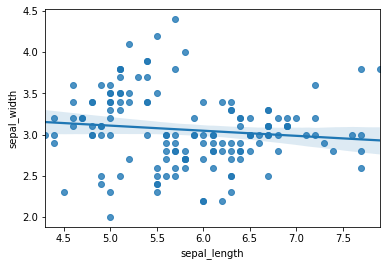

In [11]:
# library & dataset
df = sns.load_dataset('iris')

# use the function regplot to make a scatterplot
sns.regplot(x=df["sepal_length"], y=df["sepal_width"])

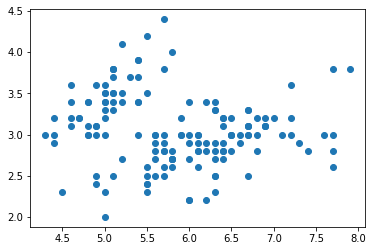

In [12]:
# Matplotlib
# Set the figure
fig, ax= plt.subplots()

# Make the chart
ax.plot(df["sepal_length"], df["sepal_width"], linestyle='none', marker='o')
plt.show()

#### 2.2.2.2 Heatmap
A heatmap is a graphical representation of data where the individual values contained in a matrix are represented as colors. It is a bit like looking a data table from above.
It is really useful to display a general view of numerical data, not to extract specific data point.

<AxesSubplot:>

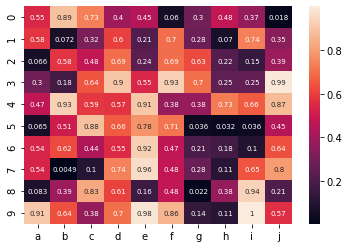

In [13]:
# Create a dataset
df = pd.DataFrame(np.random.random((10,10)), columns=["a","b","c","d","e","f","g","h","i","j"])

# plot a heatmap with annotation
sns.heatmap(df, annot=True, annot_kws={"size": 7})

#### 2.2.2.3 Correlogram
A correlogram or correlation matrix allows to analyse the relationship between each pair of numeric variables of a matrix.
The correlation between each pair of variable is visualised through a scatterplot, or a symbol that represents the correlation (bubble, line, number..).
The diagonal often represents the distribution of each variable, using an histogram or a density plot.

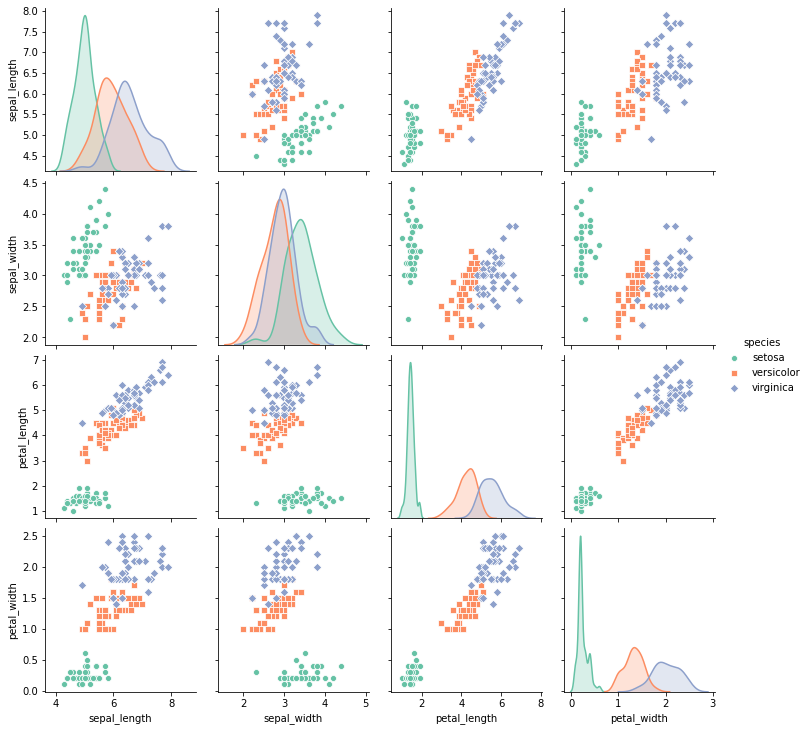

In [14]:
# seaborn
df = sns.load_dataset('iris')
sns.pairplot(df, kind="scatter", hue="species", markers=["o", "s", "D"], palette="Set2")
plt.show()

In [15]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

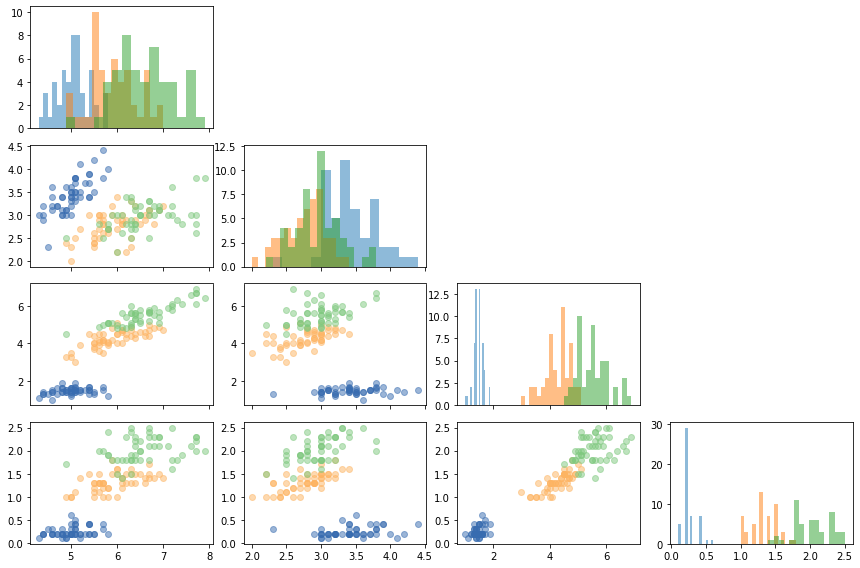

In [16]:
# Matplotlib
COLUMNS = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
COLORS = ["#386cb0", "#fdb462", "#7fc97f"]
SPECIES = ['setosa', 'versicolor', 'virginica']

fig, axes = plt.subplots(4, 4, figsize = (12, 8), sharex="col", tight_layout=True)

for i in range(len(COLUMNS)):
    for j in range(len(COLUMNS)):
        # If this is the lower-triangule, add a scatterlpot for each group.
        if i > j:
            for species, color in zip(SPECIES, COLORS):
                data = df[df["species"] == species]
                axes[i, j].scatter(COLUMNS[j], COLUMNS[i], color=color, alpha=0.5, data=data)
                
        # If this is the main diagonal, add histograms
        if i == j:
            for species, color in zip(SPECIES, COLORS):
                data = df[df["species"] == species]
                axes[i, j].hist(COLUMNS[j], bins=15, alpha=0.5, data=data)

for i in range(len(COLUMNS)):
    for j in range(len(COLUMNS)):
        # If on the upper triangle
        if i < j:
            axes[i, j].remove()              

#### 2.2.2.4 Bubble plot
A bubble plot is a scatterplot where a third dimension is added: the value of an additional numeric variable is represented through the size of the dots.

You need 3 numerical variables as input: one is represented by the X axis, one by the Y axis, and one by the dot size.

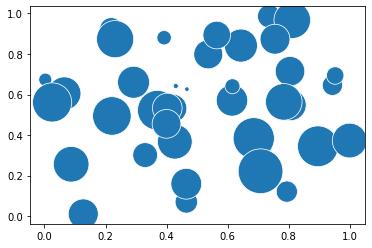

In [17]:
# use the scatterplot function to build the bubble map
sns.scatterplot(x=np.random.rand(40), 
                y=np.random.rand(40), size=np.random.rand(40),
                legend=False, sizes=(20, 2000))

# show the graph
plt.show()

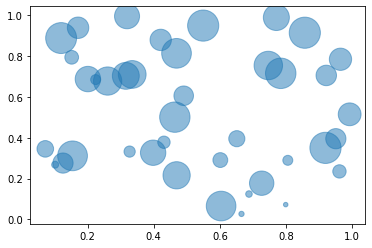

In [18]:
# create data
x = np.random.rand(40)
y = np.random.rand(40)
z = np.random.rand(40)
 
# use the scatter function
plt.scatter(x, y, s=z*1000, alpha=0.5)

# show the graph
plt.show()

#### 2.2.2.5 Line plot
A connected scatter plot shows the relationship between two variables represented by the X and the Y axis, like a scatter plot does. Moreover, dots are connected by segments, as for a line plot.

Most of the time, they are exactly the same as a line plot and just allow to understand where each measure has been done. Sometimes, points are connected in an order different from the X axis, giving a supplementary information to the graphic.

<AxesSubplot:xlabel='x_axis', ylabel='y_axis'>

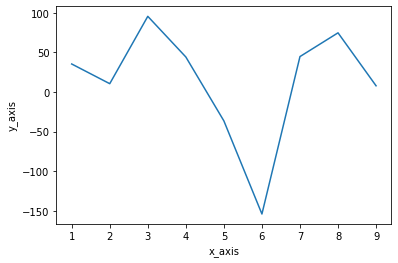

In [19]:
# data
df = pd.DataFrame({
  'x_axis': range(1,10),
  'y_axis': np.random.randn(9)*80+range(1,10)
})

sns.lineplot(x="x_axis", y="y_axis", data=df)

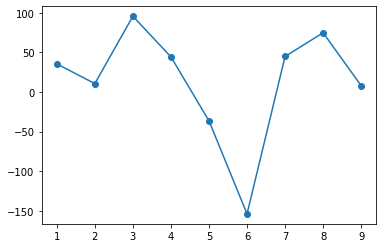

In [20]:
# plot
plt.plot('x_axis', 'y_axis', data=df, linestyle='-', marker='o')
plt.show()

#### 2.2.2.6 2D Density
A 2d density plot shows the distribution of values in a dataset across the range of two quantitative variables.

It counts the number of observations within a particular area of the 2D space and represent it using square, hexagon, or kernel density estimation.

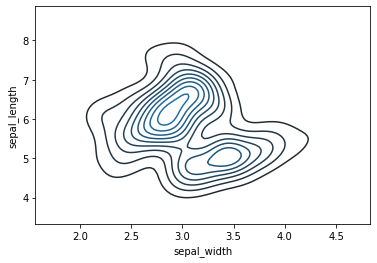

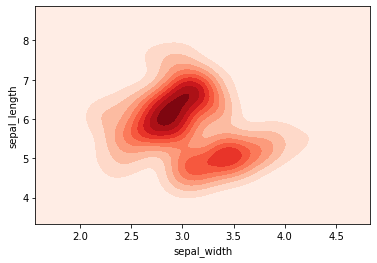

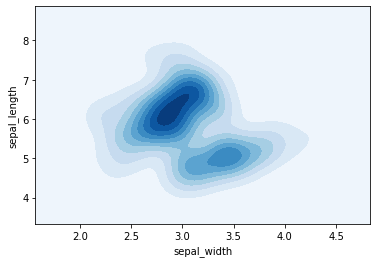

In [21]:
df = sns.load_dataset('iris')

# Basic 2D density plot
sns.kdeplot(data=df.sepal_width, data2=df.sepal_length)
plt.show()
 
# Custom the color, add shade and bandwidth
sns.kdeplot(data=df.sepal_width, data2=df.sepal_length, cmap="Reds", shade=True, bw_adjust=.5)
plt.show()

# Add thresh parameter
sns.kdeplot(data=df.sepal_width, data2=df.sepal_length, cmap="Blues", shade=True, thresh=0)
plt.show()

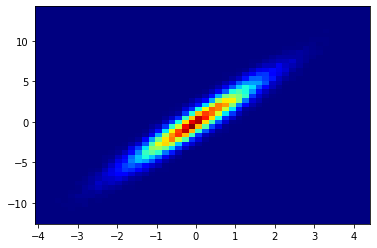

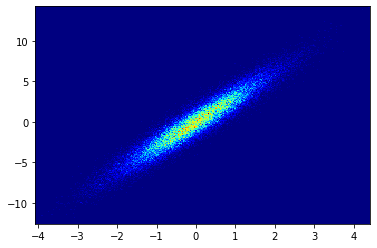

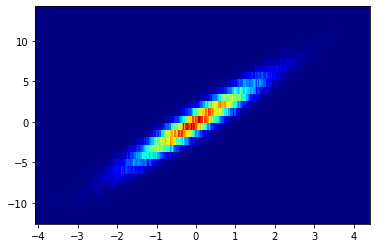

In [22]:
# Matplotlib
# create data
x = np.random.normal(size=50000)
y = x * 3 + np.random.normal(size=50000)
 
# Big bins
plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.jet)
plt.show()
 
# Small bins
plt.hist2d(x, y, bins=(300, 300), cmap=plt.cm.jet)
plt.show()
 
# If you do not set the same values for X and Y, the bins won't be a square!
plt.hist2d(x, y, bins=(300, 30), cmap=plt.cm.jet)
plt.show()

### 2.2.3 Ranking 


#### 2.2.3.1 Bar plot
A barplot shows the relationship between a numeric and a categoric variable. Each entity of the categoric variable is represented as a bar. The size of the bar represents its numeric value.

Barplot is sometimes described as a boring way to visualize information. However it is probably the most efficient way to show this kind of data. Ordering bars and providing good annotation are often necessary.

<AxesSubplot:>

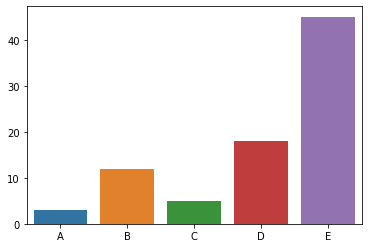

In [23]:
# Make a random dataset:
height = [3, 12, 5, 18, 45]
bars = ['A', 'B', 'C', 'D', 'E']
y_pos = np.arange(len(bars))

# plot a bar chart
sns.barplot(y=height, x=bars)

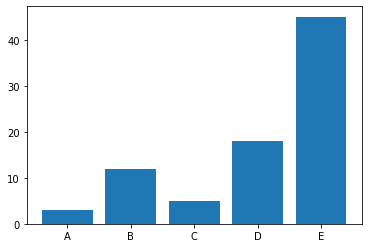

In [24]:
# Create bars
plt.bar(y_pos, height)

# Create names on the x-axis
plt.xticks(y_pos, bars)

# Show graphic
plt.show()

#### 2.2.3.2 Spider or Radar
Radar chart is a two-dimensional chart type designed to plot one or more series of values over multiple common quantitative variables. Each variable has its own axis, all axis are joint in the center of the figure.

Radar chart is often criticized in dataviz, and it is probably not the best way to convey information.

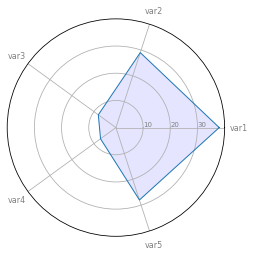

In [25]:
# Set data
df = pd.DataFrame({
'group': ['A','B','C','D'],
'var1': [38, 1.5, 30, 4],
'var2': [29, 10, 9, 34],
'var3': [8, 39, 23, 24],
'var4': [7, 31, 33, 14],
'var5': [28, 15, 32, 14]
})
 
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
values
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories, color='grey', size=8)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0,40)
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')
 
# Fill area
ax.fill(angles, values, 'b', alpha=0.1)

# Show the graph
plt.show()

#### 2.2.3.3 Parallel coordinate plot
Parallel plot or Parallel Coordinates plot allows to compare the feature of several individual observations on a set of numeric variables. Each vertical bar represents a variable and usually has its own scale. (The units can even be different). Values are then plotted as series of lines connected across each axis.

Parallel plot is the equivalent of a spider chart, but with cartesian coordinates. Thus, it is often prefered.

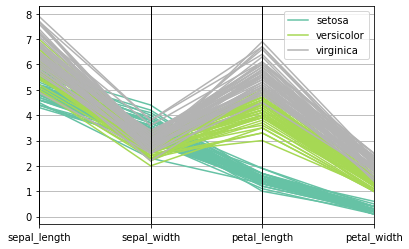

In [26]:
# Take the iris dataset
data = sns.load_dataset('iris')

# Make the plot
parallel_coordinates(data, 'species', colormap=plt.get_cmap("Set2"))
plt.show()

#### 2.2.2.4 Lollipop plot
A lollipop plot is basically a barplot, where the bar is transformed in a line and a dot. It shows the relationship between a numeric and a categoric variable.

However it is more appealing and convey as well the information. It is especially useful when you have several bars of the same height: it avoids to have a cluttered figure and a Moiré effect.

The Cleveland dot plot is a handy variation, allowing to compare the value of 2 numeric values for each group.

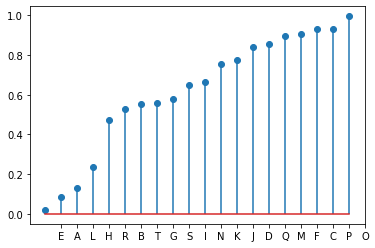

In [27]:
df = pd.DataFrame({'group':list(map(chr, range(65, 85))), 'values':np.random.uniform(size=20) })

# Reorder it following the values:
ordered_df = df.sort_values(by='values')
my_range=range(1,len(df.index)+1)

# Make the plot
plt.stem(ordered_df['values'])
plt.xticks( my_range, ordered_df['group'])
plt.show()

#### 2.2.2.5 Circular barplot
A circular barplot is a barplot, with each bar displayed along a circle instead of a line. Thus, it is advised to have a good understanding of how barplot work before making it circular.

Circular bar chart is very ‘eye catching’ and allows a better use of the space than a long usual barplot.

However it is more difficult to read the differences between each bar size. Thus, circular barcharts make sense only if you have an huge number of bar to display, and if an obvious pattern pops out.

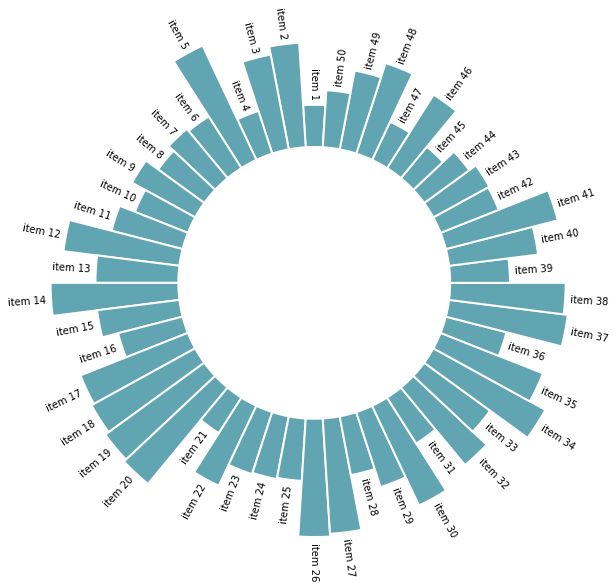

In [28]:
# Ensures reproducibility of random numbers
rng = np.random.default_rng(123)
# Build a dataset
df = pd.DataFrame({
    "name": [f"item {i}" for i in range(1, 51)],
    "value": rng.integers(low=30, high=100, size=50),
    "group": ["A"] * 10 + ["B"] * 20 + ["C"] * 12 + ["D"] * 8
})

def get_label_rotation(angle, offset):
    # Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle + offset)
    if angle <= np.pi:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"
    return rotation, alignment

def add_labels(angles, values, labels, offset, ax):
    
    # This is the space between the end of the bar and the label
    padding = 4
    
    # Iterate over angles, values, and labels, to add all of them.
    for angle, value, label, in zip(angles, values, labels):
        angle = angle
        
        # Obtain text rotation and alignment
        rotation, alignment = get_label_rotation(angle, offset)

        # And finally add the text
        ax.text(
            x=angle, 
            y=value + padding, 
            s=label, 
            ha=alignment, 
            va="center", 
            rotation=rotation, 
            rotation_mode="anchor"
        ) 

ANGLES = np.linspace(0, 2 * np.pi, len(df), endpoint=False)
VALUES = df["value"].values
LABELS = df["name"].values

# Determine the width of each bar. 
# The circumference is '2 * pi', so we divide that total width over the number of bars.
WIDTH = 2 * np.pi / len(VALUES)

# Determines where to place the first bar. 
# By default, matplotlib starts at 0 (the first bar is horizontal)
# but here we say we want to start at pi/2 (90 deg)
OFFSET = np.pi / 2

# Initialize Figure and Axis
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={"projection": "polar"})

# Specify offset
ax.set_theta_offset(OFFSET)

# Set limits for radial (y) axis. The negative lower bound creates the whole in the middle.
ax.set_ylim(-100, 100)

# Remove all spines
ax.set_frame_on(False)

# Remove grid and tick marks
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

# Add bars
ax.bar(
    ANGLES, VALUES, width=WIDTH, linewidth=2,
    color="#61a4b2", edgecolor="white"
)

# Add labels
add_labels(ANGLES, VALUES, LABELS, OFFSET, ax)

<div style="background-color:#9DDFFF; padding:30px; font-size:18px">
    <strong>Remarks: 
    </strong> I hope this set up a clear perspective on how easy it actually is to create visuals in python, but keep in mind that we're barely scratching the surface of what is possible to do with python when it comes to visualizing data. Since in this notebook my main focus is <strong>explanatory</strong> rather than <strong>exploratory</strong> data analysis, I'm gonna stop here with that aspect and leave you with two of my favorite sites for plot selection and implementation reference.
   </div>
   
[from Data to viz](https://www.data-to-viz.com/#violin): a website that not only includes refrences for python plotting but which helps you selecting the best suit for your plotting purposes.


___

# 3. Principals of effecient story telling through visuals
For this section we'll use two of my favorite books on the topic of effecient insights communication:
- [Knaflic, Cole. Storytelling With Data: A Data Visualization Guide for Business Professionals, Wiley](http://www.storytellingwithdata.com/book/downloads): Which is a great book when it comes to the subject of data visualization for storytelling. It is a must read for anyone doing any sort of data analytics. It explains the cognitive considerations behind all the data visualization best practices.
- [Charles Wheelan. Naked Statistics – Stripping the Dread from the Data](https://www.amazon.in/Naked-Statistics-Stripping-Dread-Data/dp/039334777X): For those who slept through Stats 101, this book is a lifesaver. Wheelan strips away the arcane and technical details and focuses on the underlying intuition that drives statistical analysis. He clarifies key concepts such as inference, correlation, and regression analysis, reveals how biased or careless parties can manipulate or misrepresent data, and shows us how brilliant and creative researchers are exploiting the valuable data from natural experiments to tackle thorny questions.

In the second section, we wanted to go **quick and dirty**, this is commonly referred to as **Exploratory Data Analysis**, as we simply wanted to find insights through a variety of tools. But when we are communicating information to a well-defined audience, our mission is to simplify and clarify our intended information as much as possible, which is commonly called **Exploratory Data Analysis**. 

Anyone can create a graph, you don't need python to do it, there are actually a plethora of visual creation tools, where you just select the data, a graph and that's it. But visualization is more of an art than an actual science, which means it requires a certain level of creativity. But not everyone has that ability, and I am no exception.

So if you're like me, and still want to make at least decent visuals, it's best to follow the general guidelines of the experts and that's exactly what we'll do here.

But before we learn how to create good visuals, we need to learn what does a bad one look like.

## 3.1 How to successfully create a bad visualization
We'll try to look up some common examples and see if you can spot the problem yourself.

### 3.1.1 Scale truncation
This simply refers to twik the y-axis scale, to miss lead a presentation.

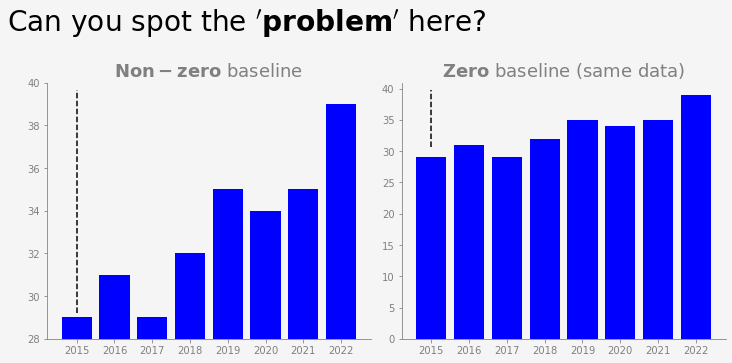

In [29]:
# Creating the data
data={'Year':[2015,2016,2017,2018,2019,2020,2021,2022],
     'Sales':[29,31, 29, 32, 35, 34, 35, 39]}
df= pd.DataFrame(data)
#df.set_index('Year', inplace=True)

# setting the graph
fig, axes =plt.subplots(figsize=(10,5), nrows=1, ncols=2)
fig.patch.set_facecolor('#f6f5f5')

# ploting
axes[0].bar(df.Year, df.Sales, color='blue')
axes[1].bar(df.Year, df.Sales, color='blue')

axes[0].set_title('$\\bf{Non-zero}$ baseline', fontsize=18, color='grey')
axes[1].set_title('$\\bf{Zero}$ baseline (same data)', fontsize= 18, color='grey')

# Adding dashlines for clarity
axes[0].axvline(x=2015, ymin=.1, ymax=.97, color = 'black', linestyle ='--')
axes[1].axvline(x=2015, ymin=.75, ymax=.97, color = 'black', linestyle ='--')

# Setting up axis for extra clarity
for ax in axes:
    ax.tick_params(axis='x', colors='grey')
    ax.tick_params(axis='y', colors='grey')
    ax.spines['left'].set_color('grey')
    ax.spines['bottom'].set_color('grey')
    ax.patch.set_facecolor('#f6f5f5')
    for s in ['top', 'right']:
        ax.spines[s].set_visible(False)



        
axes[0].set_ylim(28, 40)

plt.suptitle("Can you spot the $\\bf{'problem'}$ here?", 
             fontsize=28,x=0.32, y=1, ha='center')
plt.tight_layout()
plt.show()

what looked like a huge increase on the left is reduced considerably when plotted appropriately. Although that 2022 results are better than past years, maybe it wasn't sufficient. e.g. a person might change the scale say to convince shareholders that this year's sales were excessively good. This can also be done to reduce the importance of a key aspect such as potential losses. The are indeed a plathora of cases where this can be applied, but you get the main idea. let's see other examples.

### 3.1.2 Unecessary adds and overly crowded graphs
Let's start with the abvious 3D Pie charts.
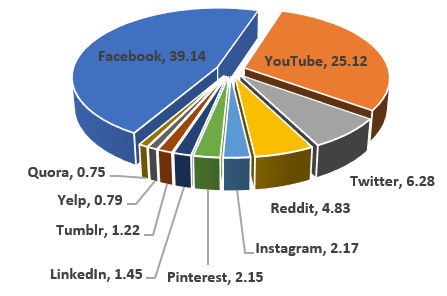

The Python libraries don't actually include anything like that. But you'll see it regularly when using other software, so what are the main problems here. In this case, 3D does not serve a single purpose. In fact, it is more of an abstraction of information with angles that emphasize some parts more than others. There is so much information that anyone looking at it has no idea where their eyes should set.

Even with the 3D aspect removed, a pie chart should never be used beyond two or three labels at most. Dependind on the actual aim of the plot we can subtitut it with a better alternative (e.g: the horizontal bar plot)

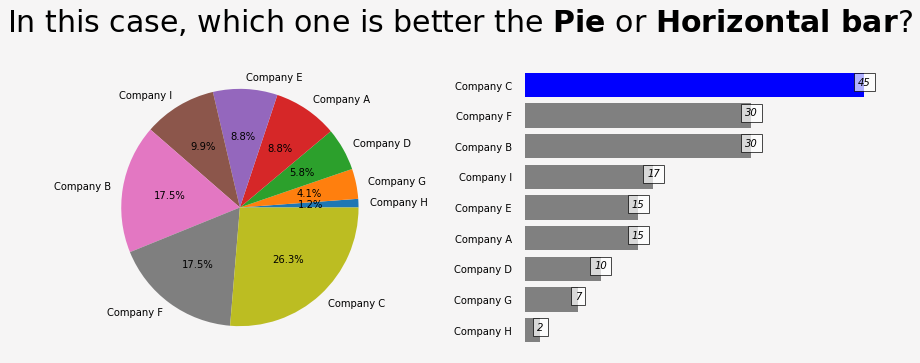

In [30]:
# a regular pie plot
# Creating the data
data={'Companies': ['Company A', 'Company B', 'Company C',
                    'Company D', 'Company E', 'Company F',
                    'Company G', 'Company H', 'Company I'],
      'Value': [15, 30, 45, 10, 15, 30, 7, 2, 17]}

color=['grey','grey','grey','grey','grey','grey','grey','grey','blue']

df=pd.DataFrame(data)
df.sort_values('Value', inplace=True, ascending=True)
df.reset_index(drop=True, inplace= True)

# function to add value labels
def addlabels(labels,values):
    for i in range(len(labels)):
        plt.text(values[i], i ,values[i], ha = 'center', style='italic',
                 Bbox = dict(facecolor = 'white', alpha = .7))

# Setting the figure
fig, axes = plt.subplots(figsize=(12,5),nrows=1, ncols=2)
fig.patch.set_facecolor('#f6f5f5')

# Plotting the data
axes[0].pie(df.Value, normalize=True, labels=df.Companies, autopct='%1.1f%%')
axes[1].barh(df.Companies, df.Value, color=color)

# Setting the axis for clarity
for s in ['top', 'bottom', 'left', 'right']:
    axes[1].spines[s].set_visible(False)

axes[1].yaxis.set_ticks_position('none')
axes[1].get_xaxis().set_visible(False)
axes[1].yaxis.set_tick_params(pad = 10)
axes[1].patch.set_facecolor('#f6f5f5')

# running the label function
addlabels(df['Companies'], df['Value'])

# Setting figure title
plt.suptitle("In this case, which one is better the $\\bf{Pie}$ or $\\bf{Horizontal~bar}$?", 
             fontsize=30,x=0.5, y=1, ha='center')
plt.tight_layout()
plt.show()

Isn't waaaay simpler, in contrary to the visual polution on the left, it's way clearer to identify important insights including the top and worst company, as well as the respective ranking.

Alright, let's look up a couple other examples a bad graph.
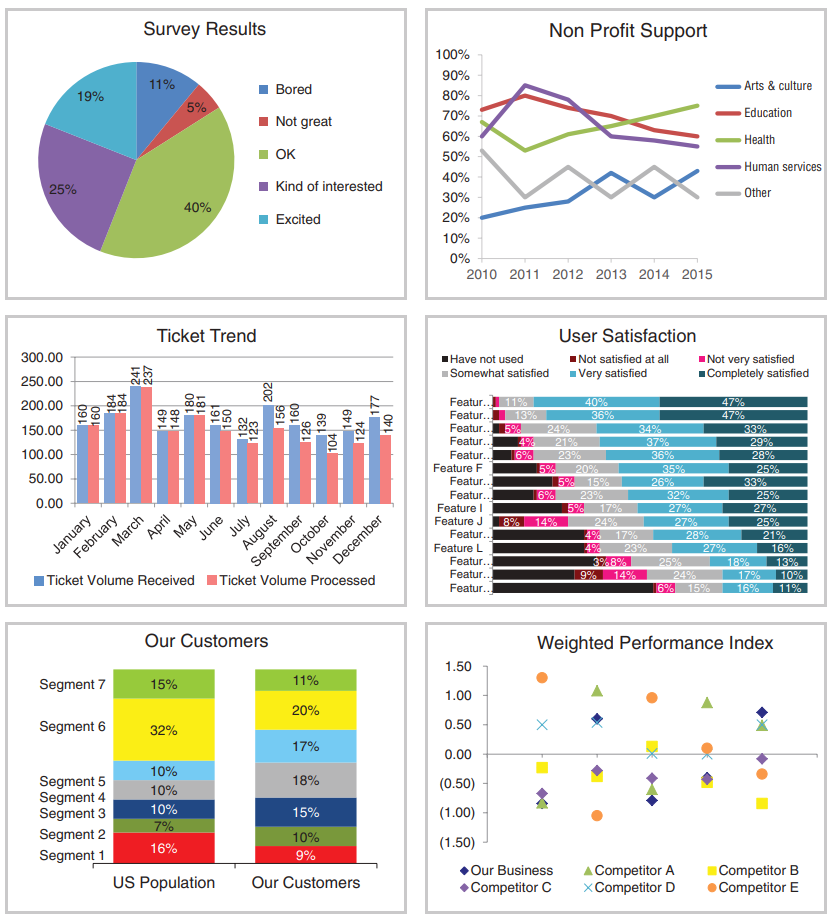

Isn't it just exhausting trying to make sense of it all? Imagine being a member of the general public looking at one of these graphs, it's just repulsive. But unfortunately, we create such graphs every day and everywhere. It's time to learn how it's really done.

## 3.2 Guidelines of efficient visualization
In [Knaflic, Cole. Storytelling With Data](http://www.storytellingwithdata.com/book/downloads) the author establishes an excelent case for a good visual, the latter can be summurized in the follwing 6 points.
1. Understand the context
2. Choose an appropriate visual display
3. Eliminate clutter
4. Focus attention where you want it
5. Think like a designer
6. Tell a story

Note that this methodology is applicable regardless of the software used and deals with explanatory, not exploratory, data analysis.
We will explore each of these in bullet points, but I still recommend that you read the full book, as the author goes into more depth.

### 3.2.1 Understand the context
This first guideline boils down to two main aspects:
- Properly identify the public audience to whom your message is distned.
- Understand the essense of the message you want to communicate.

So how do you go about it? 
1. **Identify your Who, What, How.**
    - **Who** is your audience?
        - What is their level of knowledge of the subject?
        - What background information is relevant or essential?
        - What influence do they have on your work?
        - What are their motivations?
    - **What** do you want them to do?
        - In general, we don't do an analysis project for the sake of it, there is often a message behind it, a call to action from your audience, what is it? Don't assume they will connect the dots, be explicit.
    - **How** will your data strengthen your arguments?
        - What kind of data will serve as evidence for your case?
2. **Get to the essence of your message**.
    - I love this quote from *Blaise Pascal*, *"I would have written a shorter letter, but I didn't have the time "*. It takes a lot more work to be concise than to be wordy, keep that in mind.
    - Apply the **3 Minute Story** challenge (the "So what?"), try to present your entire thesis in 3 minutes or less, this will help you get the best ideas out and reduce information clutter for your audience.
    - Apply the **Big Idea** method, a single sentence that should:
        - Articulate your unique point of view
        - Explain the issue
3. **Without Software - Initial Planning and Structure Creation**
    - Avoid this unnecessary attachment (and work!) by starting with simple tools such as a whiteboard, post-it notes or plain paper. And leave the final implementation in the software the last.
    
I've included here the big idea sheet from the book available for free on the book's web site. You can use the latter to ease up the process of understanding the context.
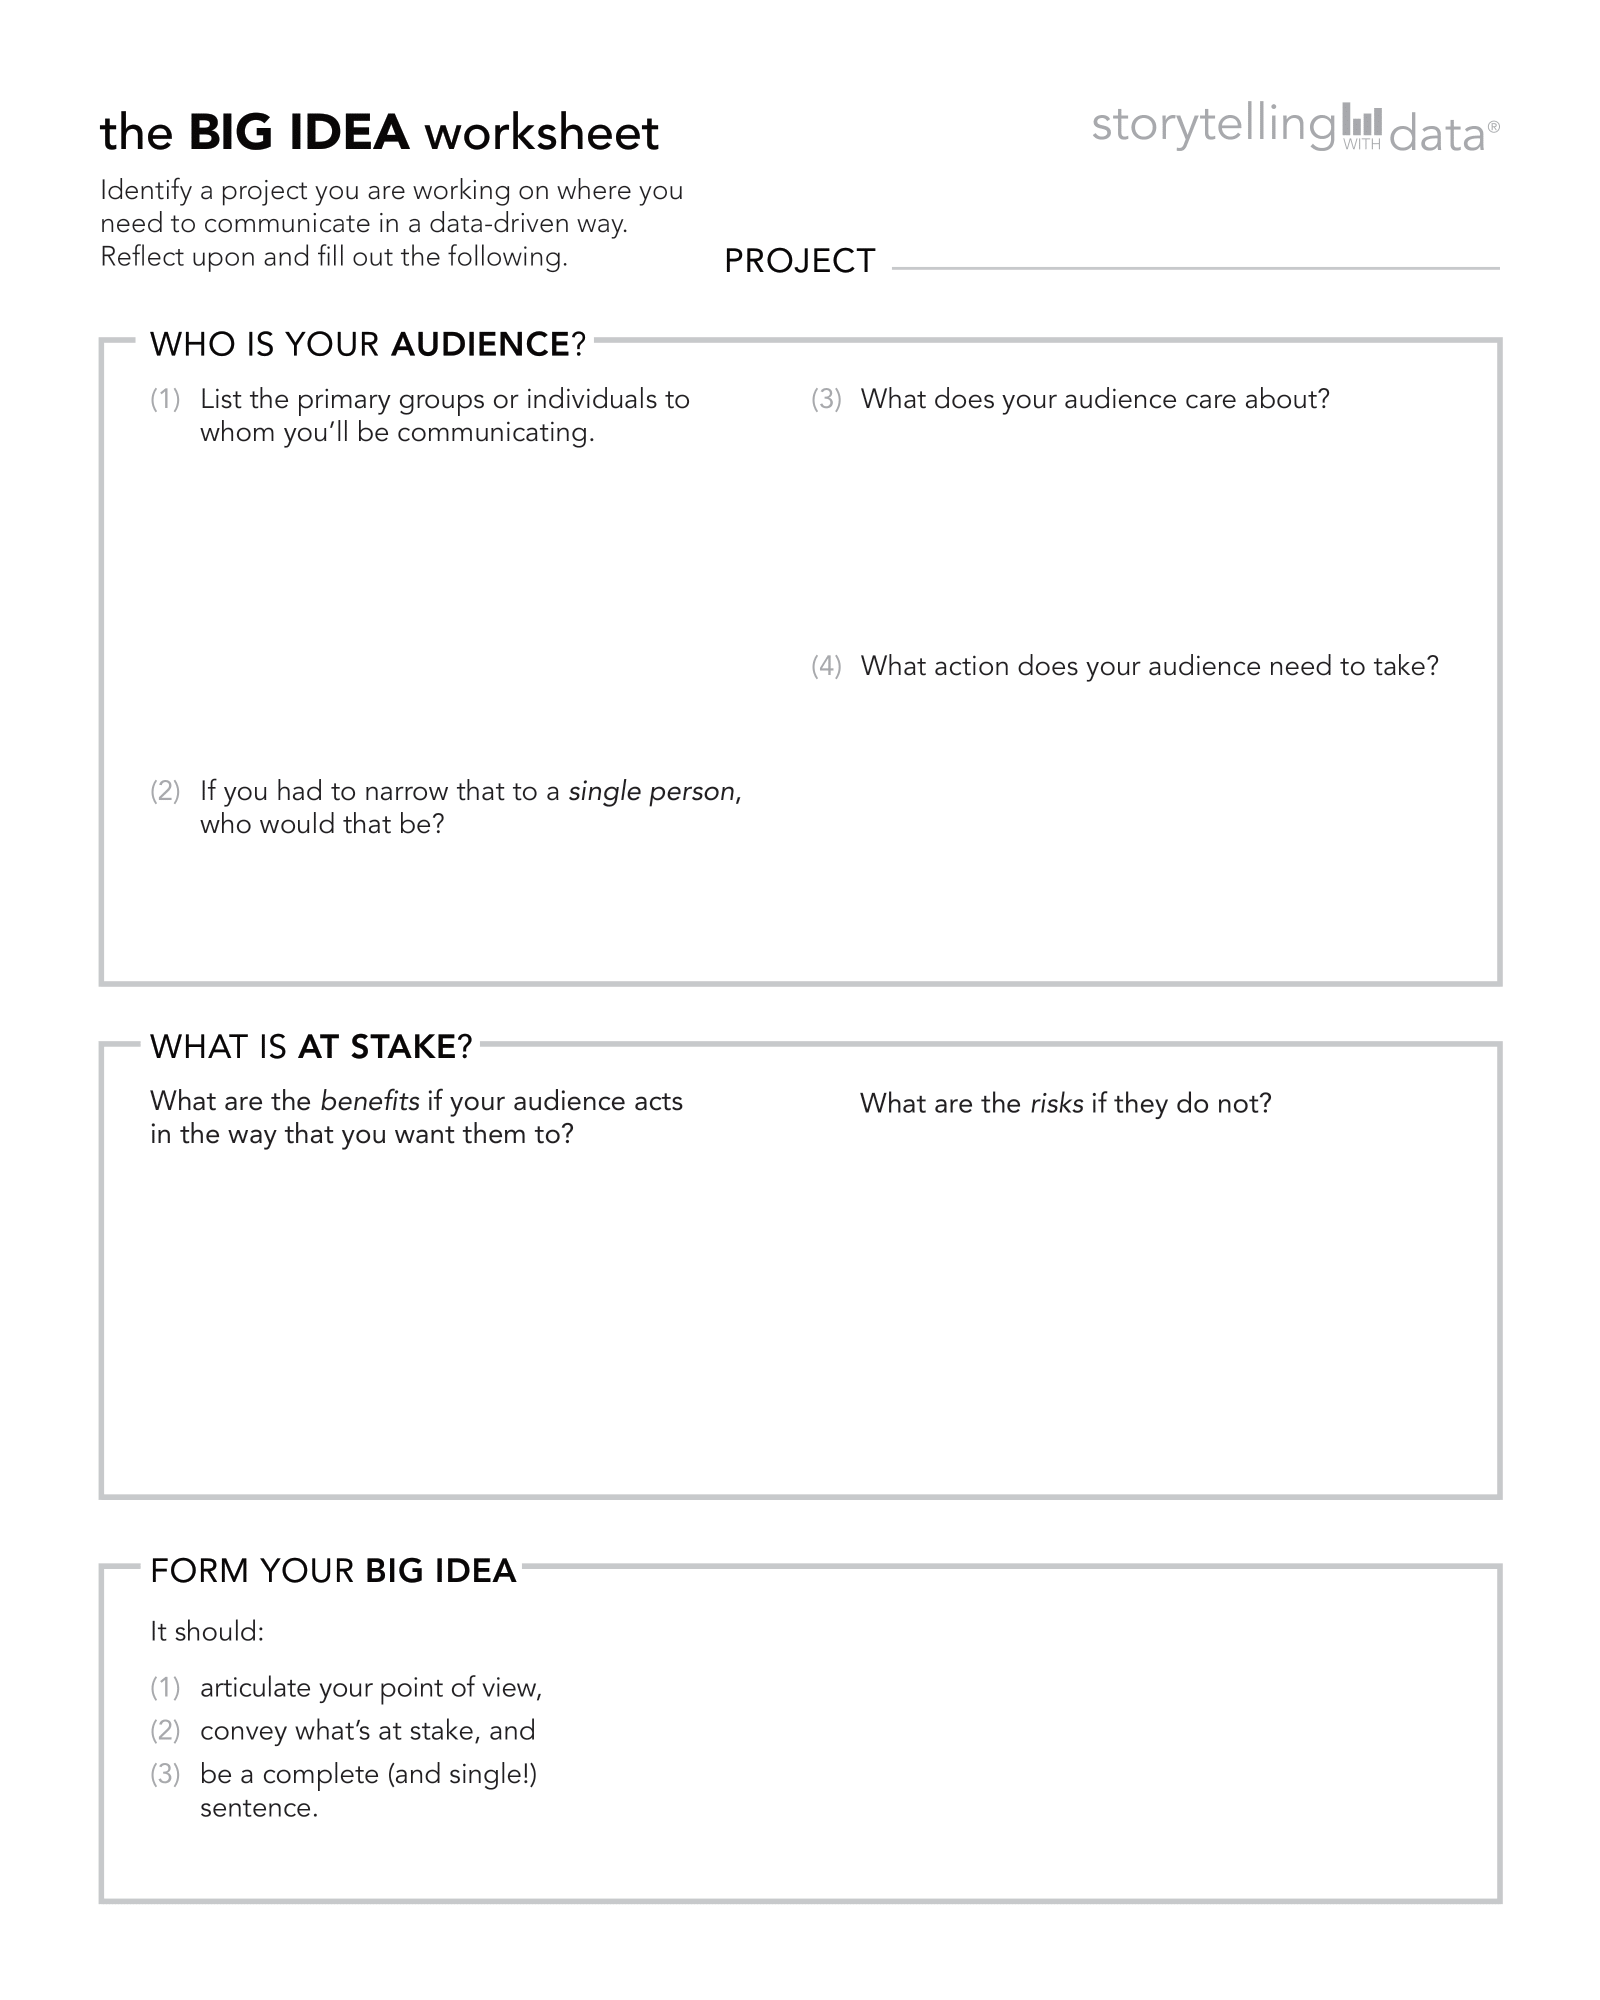



### 3.2.2 Choose an effective visual display
Once you’ve taken time to understand the context and planned your communication in a low-tech fashion, comes the question: 
when I have some data I need to show, how do I do that in an effective way? This is the topic we’ll tackle next.

What is the right graph for my situation? The answer is always the same: Whatever will be **easiest** for my audience to read.

The author sugests a set of 12 visuals there are both simple and easy to emplement, the latter include the follwing:

![](https://static1.squarespace.com/static/55b6a6dce4b089e11621d3ed/t/55dbac72e4b000099dccf405/1440459893535/)


1. **Simple Text**: When you only have one or two numbers to share, simple text can be a great way to communicate. Consider using just the number, with as much emphasis as possible, and a few supporting words to clearly express your point.
2. **Table**: Communicate to a mixed audience whose members will each be looking for their particular line of interest. If you need to communicate several different units of measurement, this is also usually easier with a table than a graph, but when using it, be sure to let the data stand out the most, pushing the borders into the background with a light color.
3. **Heatmap**: This is simply a table with colored markers, which reduces mental processing, helping our eyes and brain target potential points of interest more quickly.
4. **Scatter**: We've already discussed the usefulness of this type of chart, but the author suggests using colors, lines and text to highlight important points.
5. **Line**: Data are assumed to be connected, do not connect the points if the data are not continuous, and if multiple series are plotted, be sure to emphasize the one you are interested in.
6. **Slope graphs**: These can be useful when you have two periods or points of comparison and want to quickly show relative increases and decreases or differences in various categories between the two data points.
7. **Vertical Bar**: Bar charts are easy for our eyes to read. Our eyes compare the ends of the bars, so it is easy to quickly see which category is larger, which is smaller, as well as the incremental difference between categories. Note that it is important that bar charts always have a zero baseline (where the x-axis crosses the y-axis at zero), otherwise you get a false visual comparison.
8. **Stacked bars (horizontal and vertical)**: The use cases for stacked vertical bar charts are more limited. They are supposed to allow you to compare totals between categories and to see the subcomponents of a given category. This can quickly become visually overwhelming, so make sure the main purpose is clear.
9. **Waterfall**: The waterfall chart can be used to separate the elements of a stacked bar chart to focus on one element at a time, or to show a starting point, increases and decreases, and the resulting end point.
10. **Horizontal Bar**: This is the author's favorite, as it is extremely easy to read and very intuitive, and the display itself is more appropriate for long category names, reducing clutter.
11. **Area Charts**: Because they are two-dimensional, this makes them more difficult to read. Except when it is necessary to view numbers of very different magnitudes. The second dimension you get by using a square for this (which has both height and width, as opposed to a bar that has only height or width) allows you to do this in a more compact way than is possible with one dimension.

So let's put these into work and compare each. Starting of with the a case for a **Simple text**.

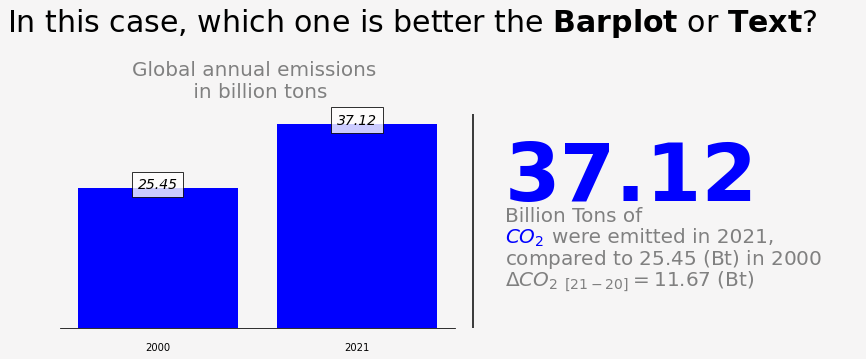

In [31]:
# 1. Simple text
# Creating the dataframe from OWD, great source by the way!
data ={'Year':['2000', '2021'],
       'Annual Emissions (billion ton)':[25.45, 37.12]}
df=pd.DataFrame(data)
df.set_index('Year', inplace=True)

# Setting the plot
fig, axes= plt.subplots(figsize=(12, 5), nrows=1, ncols=2)
fig.patch.set_facecolor('#f6f5f5')


# bar plot
axes[0].bar(df.index, df['Annual Emissions (billion ton)'], color='blue')
axes[0].set_title('Global annual emissions \n in billion tons', fontsize=20
                  ,color='grey', ha ='center', y=1.05)

def addlabels(ax, x,y):
    for i in range(len(x)):
        ax.text(i, y[i],y[i], ha = 'center', style='italic',
                 Bbox = dict(facecolor = 'white', alpha = .8), fontsize=14)

addlabels(axes[0],data['Year'], data['Annual Emissions (billion ton)'])

# text on the graph
axes[1].text(0.1,0.6, '37.12', fontsize= 80, color='blue', fontweight= 'black')
axes[1].text(0.1,0.5, 'Billion Tons of', fontsize= 20, color='grey')
axes[1].text(0.1,0.4, '$CO_2$', fontsize= 20, color='blue')
axes[1].text(0.22,0.4, 'were emitted in 2021,', fontsize= 20, color='grey')
axes[1].text(0.1,0.3, 'compared to $25.45$ (Bt) in 2000', fontsize= 20, color='grey')
axes[1].text(0.1,0.2, '$\Delta CO_2~_{[21-20]}= 11.67$ (Bt)', fontsize= 20, color='grey')


# Setting up axis for extra clarity
for s in ['top', 'left', 'right']:
    axes[0].spines[s].set_visible(False)
for s in ['top', 'left', 'right', 'bottom']:
    axes[1].spines[s].set_visible(False)
    
for ax in axes:
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    ax.patch.set_facecolor('#f6f5f5')
    
axes[0].get_yaxis().set_visible(False)
axes[1].get_yaxis().set_visible(False)
axes[1].get_xaxis().set_visible(False)
axes[0].xaxis.set_tick_params(pad = 10)

plt.suptitle("In this case, which one is better the $\\bf{Barplot}$ or $\\bf{Text}$?", 
             fontsize=30,x=0.42, y=0.99, ha='center')
plt.axvline(x = 0.02, color = 'black')

plt.tight_layout()
plt.show()

The text with a few colors greatly simplifies the graphic on the left into a simple line. As a general rule, when you want to show a specific thing, do it with a sample text.

Ok, let's look at the tables, here I'm going to take a snapshot of the book directly, because displaying tables is not the strong point of the python plotting libraries.

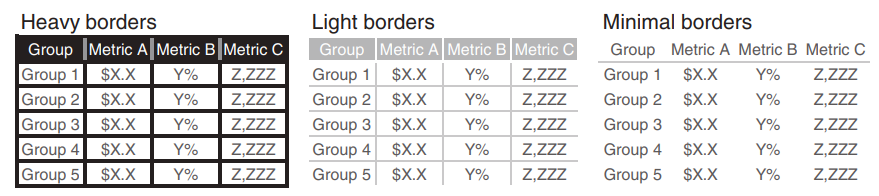

Notice how data values are more clear as with the dark borders. So the next time you employ them, make sure to light up the borders and to put a well defined title that summaries the **Table**.

Alright jumping to the **Heatmap** now.

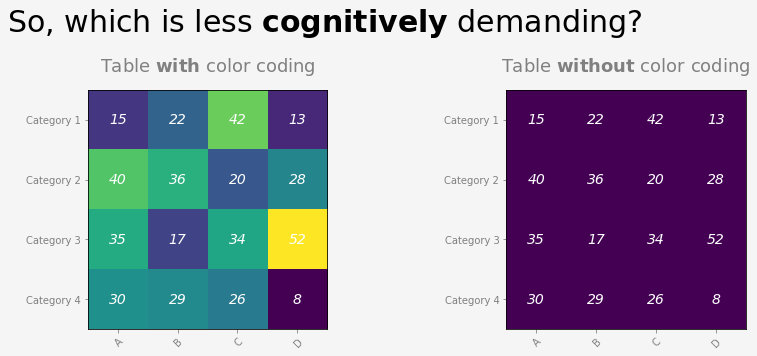

In [32]:
# Heat map
Company = ["A", "B", "C", "D"]
Category = ["Category 1", "Category 2", "Category 3", "Category 4"]

Count = np.array([[15, 22, 42, 13, ],
                    [40, 36, 20, 28],
                    [35, 17, 34, 52],
                    [30, 29, 26, 8 ]])

zeros=np.zeros((4,4))

fig, axes = plt.subplots(figsize=(12, 5), nrows=1, ncols=2)
fig.patch.set_facecolor('#f6f5f5')
im = axes[0].imshow(Count)
im2 = axes[1].imshow(zeros)


for ax in axes:
    ax.set_xticks(np.arange(len(Company)))
    ax.set_yticks(np.arange(len(Category)))
    ax.set_xticklabels(Company)
    ax.set_yticklabels(Category)

# Rotate the tick labels and set their alignment.
for ax in axes:
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

for ax in axes:
    ax.tick_params(axis='x', colors='grey')
    ax.tick_params(axis='y', colors='grey')
    ax.patch.set_facecolor('#f6f5f5')
    for i in range(len(Category)):
        for j in range(len(Company)):
            text = ax.text(j, i, Count[i, j],
                           ha="center", va="center", color="w", 
                           fontsize=14, fontstyle='italic')

        
axes[0].set_title("Table $\\bf{with}$ color coding", fontsize=18, y=1.05, color='grey')
axes[1].set_title("Table $\\bf{without}$ color coding", fontsize=18, y=1.05, color='grey')

plt.suptitle("So, which is less $\\bf{cognitively}$ demanding?", 
             fontsize=30,x=0.42, y=0.98, ha='center')
fig.tight_layout()
plt.show()

In the color-coded chart, it is easy to spot that **D**, **Category 3** has the highest value, and that the lowest value is **D, Category 4**.
The latter is not as obvious in the second chart, and to be clear, this is only a 4x4 matrix, sometimes you will literally be inspecting matrices with hundreds of cells. So yes, the cues are very useful.

Alright up to the next one, **Scatter** plots.

For the scatter data, let's take the data that is embedded in the seaborn library. Yes! In fact there are a number of libraries in python with pre-built datasets, and we can access them as easily as the following.

In [33]:
# We can get the list of available datasets using
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [34]:
# Let's take the iris flowers dataset as an example
df= sns.load_dataset('iris')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


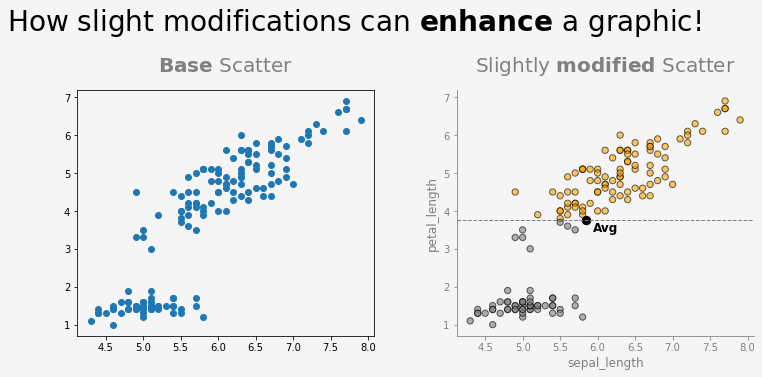

In [35]:
# Let's compare a simple graph and one with a bit more modifications
# Initialize layout
fig, axs = plt.subplots(figsize = (11, 7), nrows=1, ncols=2)
fig.patch.set_facecolor('#f6f5f5')

# Set the variables
x= df['sepal_length']
y= df['petal_length']

# Graph one
axs[0].scatter(x, y)
axs[0].set_title('$\\bf{Base}$ Scatter', fontsize=20, color='grey', y=1.05)


# Graph two
axs[1].set_title('Slightly $\\bf{modified}$ Scatter', fontsize= 20, color='grey', y=1.05)
axs[1].scatter(x, y, s=40, alpha=0.6, edgecolors="k", 
               color=['grey' if i else 'orange' for i in (df.sepal_length < x.mean()) & (df.petal_length < y.mean())])
axs[1].scatter(x.mean(), y.mean(), s=70, edgecolors="k", color='black')
axs[1].tick_params(axis='x', colors='grey')
axs[1].tick_params(axis='y', colors='grey')
axs[1].spines['left'].set_color('grey')
axs[1].spines['bottom'].set_color('grey')
axs[1].set_xlabel('sepal_length', fontsize=12, color='grey')
axs[1].set_ylabel('petal_length', fontsize=12, color='grey')
axs[1].axhline(y.mean(), color='grey', lw=1, linestyle='--')
axs[1].text(x.mean()+0.1, y.mean()-0.3, s='Avg', 
            fontsize=12, color='black', fontweight='bold')

for s in ['top', 'right']:
    axs[1].spines[s].set_visible(False)

for ax in axs:
    ax.patch.set_facecolor('#f6f5f5')
#Set figure title
plt.suptitle("How slight modifications can $\\bf{enhance}$ a graphic!", 
             fontsize=28,x=0.43, y=0.82, ha='center')
plt.tight_layout(pad=5.0)
plt.show()

Although these changes might look overwhelming in code, if you notice they get quite repretitive realy fast, and you can in fact set them a single time in the matplotlib parameters, and they'll be used automaticly.

Note that these small changes is what set a part exploratory and explanatory data analysis.

Up next is the line plot, and more specifaclly, multiple series line plot. for this example we'll use the volve production data which includes multiple wells.

In [36]:
# Line plot 
df= pd.read_csv('Data\Volve production data.csv')
#df['Wellbore name'].unique()

df['Year']=df['Year'].astype(str)
df['Month']=df['Month'].astype(str)
df['date']=(df['Year']+'/' +df['Month'])

# Convert to datetimes
df['date']= pd.to_datetime(df['date'], format='%Y/%m')
df.set_index('date', inplace=True)

# lets select data from 2014
df= df.loc['2014-04-01':'2016-04-01']

# Let's take 4 wells
well1=df.loc[(df['Wellbore name']== '15/9-F-1 C')]
well2=df.loc[(df['Wellbore name']== '15/9-F-11')]
well3=df.loc[(df['Wellbore name']== '15/9-F-12')]
well4=df.loc[(df['Wellbore name']== '15/9-F-14')]

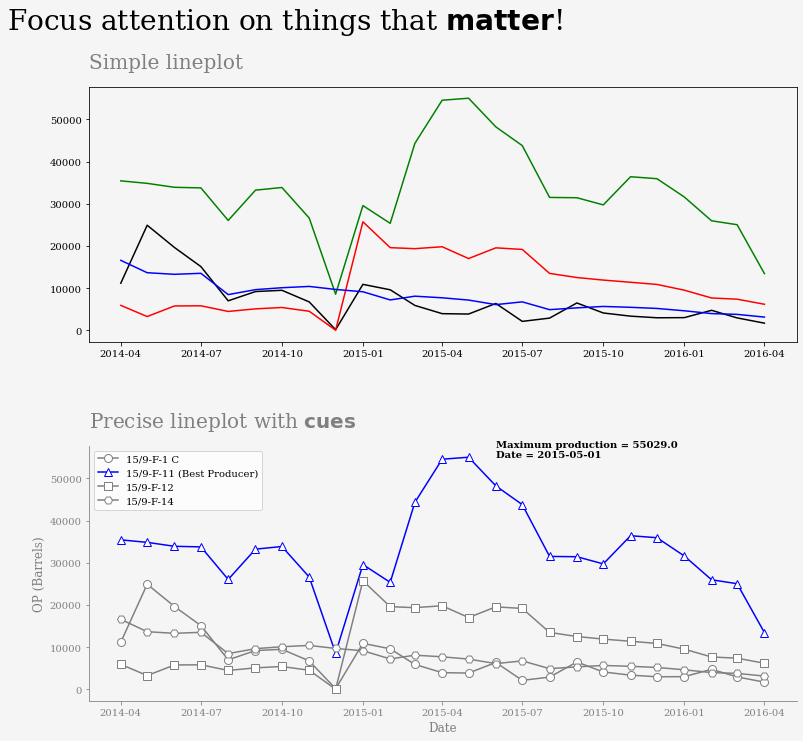

In [57]:
fig, axes= plt.subplots(figsize=(12, 12), nrows=2, ncols=1)
fig.patch.set_facecolor('#f6f5f5')
axes[0].patch.set_facecolor('#f6f5f5')
axes[1].patch.set_facecolor('#f6f5f5')

axes[0].plot(well1.index ,well1.Oil, color = 'black',
             label = '15/9-F-1 C')
axes[0].plot(well2.index ,well2.Oil, color = 'green', 
             label = '15/9-F-11')
axes[0].plot(well3.index ,well3.Oil, color = 'red',
             label = '15/9-F-12')
axes[0].plot(well4.index ,well4.Oil, color = 'blue', 
             label= '15/9-F-14')
axes[0].set_title('Simple lineplot', fontsize= 20, color='grey', y=1.05, loc='left')



# Lower graph enhanced graph
axes[1].plot(well1.index ,well1.Oil, color = 'grey',
             marker = 'o', markerfacecolor = 'white', markersize = 8,
             label = '15/9-F-1 C')
axes[1].plot(well2.index ,well2.Oil, color = 'blue', 
             marker = '^', markerfacecolor = 'white', markersize = 8,
             label = '15/9-F-11 (Best Producer)')
axes[1].plot(well3.index ,well3.Oil, color = 'grey',
             marker = 's', markerfacecolor = 'white', markersize = 8,
             label = '15/9-F-12')
axes[1].plot(well4.index ,well4.Oil, color = 'grey', 
             marker = 'H', markerfacecolor = 'white', markersize = 8,
             label= '15/9-F-14')

axes[1].legend(loc='upper left')
# Investigating the maximal production
mp_well_2=well2.loc[well2['Oil']==well2['Oil'].max()].index
mp_well_2=['2015-06-01']

# Graph two
axes[1].set_title('Precise lineplot with $\\bf{cues}$', fontsize= 20, color='grey', y=1.05, loc='left')
axes[1].tick_params(axis='x', colors='grey')
axes[1].tick_params(axis='y', colors='grey')
axes[1].spines['left'].set_color('grey')
axes[1].spines['bottom'].set_color('grey')
axes[1].set_xlabel('Date', fontsize=12, color='grey')
axes[1].set_ylabel('OP (Barrels)', fontsize=12, color='grey')
axes[1].text(mp_well_2, well2.Oil.max(), s='Maximum production = {}\nDate = {}'.format(well2.Oil.max(), '2015-05-01'), 
            fontsize=10, color='black', fontweight='bold')
for s in ['top', 'right']:
    axes[1].spines[s].set_visible(False)

#Set figure title
plt.suptitle("Focus attention on things that $\\bf{matter}$!", 
             fontsize=28,x=0.35, y=.9, ha='center')

plt.tight_layout(pad=5.0)
plt.show()

That's about it, rather than putting in all the data and letting the audience find the relationship themselves, be sure to focus on the most insightful details you want to communicate.

**Note** When it comes to data with multiple categories or series, as in this case, I like to use markers and reserve the color for the most important aspect, as they are more inclusive (let's say some people in the audience are colorblind), which could be problematic and extremely uncomfortable for them, so try to keep those aspects in mind.

All right, we've already seen what a bad bar graph looks like, just don't change the **y** axis and don't use colors if they don't communicate information. Now let's move on to the **Waterfall chart** and as it is not included in the matplotlib library, we will have to build one ourselves.

In summary, the **Waterfall chart** can be used to separate the elements of a stacked bar chart to focus on one element at a time, or to show a starting point, 
increases and decreases, and the resulting end point. Let's use an example to illustrate this.

Suppose we want to see the total expenses of a project, rather than using a stacked bar, we can get the details in a more intuitive way, as follows.

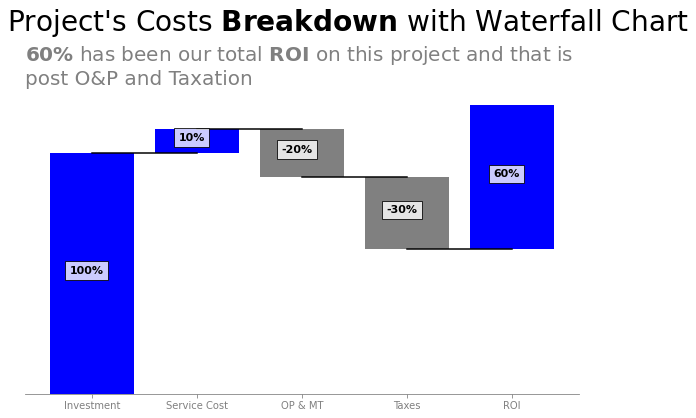

In [38]:
# Let's create a data example
df = pd.DataFrame({'category':['Investment','Service Cost','OP & MT','Taxes','ROI'],
                   'num':[100,10,-20,-30,60]})

def waterfall(df, x, y):
    fig, ax = plt.subplots(figsize=(8,6), nrows=1, ncols=1)

    # calculate running totals
    df['tot'] = df[y].cumsum()
    df['tot1']=df['tot'].shift(1).fillna(0)
    
    # lower and upper points for the bar charts
    lower = df[['tot','tot1']].min(axis=1)
    upper = df[['tot','tot1']].max(axis=1)
    
    # mid-point for label position
    mid = (lower + upper)/2
    
    # positive number shows green, negative number shows red
    df.loc[df[y] >= 0, 'color'] = 'blue'
    df.loc[df[y] < 0, 'color'] = 'grey'
    
    # calculate connection points
    connect= df['tot1'].repeat(3).shift(-1)
    connect[1::3] = np.nan
    
    # plot first bar with colors
    ax.bar(x=df[x],height=upper, color =df['color'])
    
    # plot second bar - invisible
    ax.bar(x=df[x], height=lower,color='white')
    # plot connectors
    ax.plot(connect.index,connect.values, 'k' )

    # plot bar labels
    for i, v in enumerate(upper):
        ax.text(i-.05, mid[i], f"{df[y][i]:,.0f}%", 
                ha = 'center', weight='bold', color='black',
                Bbox = dict(facecolor = 'white', alpha = .8), fontsize=11)
    
    # Custom axis
    ax.set_title('$\\bf{60\%}$ has been our total $\\bf{ROI}$ on this project and that is\npost O&P and Taxation', 
                 fontsize= 20, color='grey', y=1, loc='left', x=0)
    ax.tick_params(axis='x', colors='grey')
    ax.spines['bottom'].set_color('grey')
    ax.yaxis.set_ticks_position('none')
    ax.get_yaxis().set_visible(False)

    for s in ['left','top', 'right']:
        ax.spines[s].set_visible(False)
        

    #Set figure title
    plt.suptitle("Project's Costs $\\bf{Breakdown}$ with Waterfall Chart", 
                 fontsize=28,x=0.58, y=0.96, ha='center')
    plt.tight_layout()

waterfall(df,'category','num')

I know the function may seem a bit complex at first, but I've included the process in the comments, step by step. The concept is simple:
- Create a normal bar chart
- Create another bar chart and overlay it on top of the first bar chart, then set the color of the new bars the same way as the background color to hide the bottom section of the first bar chart.

Essentially, since we can't see the second set of bars, we can use them to "hide" the other set of bars! As in the following illustration - there is one set of "invisible bars" on the graph but we won't see them.

The blue and gray represent *earnings* and *losses* respectively, making it easier to understand the influence of a category and its magnitude.

**Final guidelines**
- Do not use **3D** unless necessary.
- Do not change the **y-axis**.
- Do not add a secondary **y-axis**.
- Use colors, text, cues and indicators to **avoid cognitive overload**.
- Be specific in the information you want to communicate.
- Take time to review your flow
- Define a unique color palette that best represents your case.
- And remember, the best visual is always the easiest to interpret.

### 3.2.3 Clutter is enemy
We'll go a little bit more rapidly in the next sections, so buckle up.

The next guideline is avoir clutter and it's pretty much self-explonatory as a concept. We have to understand that every single element we add to the page or screen takes up cognitive load on the part of your audience. With cognitive load being the mental effort required to learn new information.

So what is clutter?
it is defined as simply as visual elements that take up space but don't increase understanding.

When our visuals feel complicated, we run the risk of our audience deciding that they don't want to take the time to understand what we're showing them, at which point we've lost our ability to communicate with them. So let's spend some time understanding how this migt be breaken down.

Let's examine **Gestallt Principles** of visual perception, the latter describes how we **subconsiously** order what we see in the world:
* <font color=blue>Proximity</font>
    * We tend to think of objects that are physically close together as being part of a group
* <font color=blue>Similarity</font> 
    * Objects that are of similar color, shape, size, or orientation are perceived as related or belonging to part of a group
* <font color=blue>Enclosure</font>
    * We think of objects that are physically enclosed together as belonging to part of a group.
* <font color=blue>Closure</font>
    * The concept of closure says that people like things to be simple and fit into the constructs that are already in our head e.g. when parts of a whole are missing, our eyes fill in the gaps.
* <font color=blue>Continuity</font>
    * The principle of continuity is similar to closure: when looking at objects, our eyes seek the smoothest path and naturally create continuity in what we see even where it may not explicitly exist.
* <font color=blue>Connection</font>
    * We tend to think of objects that are physically connected as part of a group.
    
![](https://i.pinimg.com/originals/a6/0d/c3/a60dc33958386baf31ee54f852230524.jpg)

Let's take a quick example to illustrate the latter.

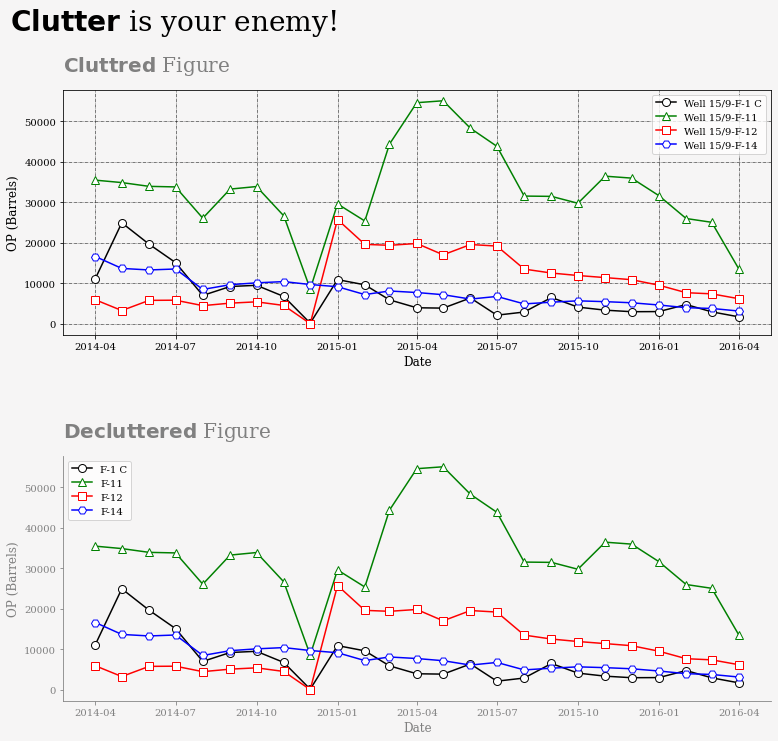

In [53]:
fig, axes= plt.subplots(figsize=(12, 12), nrows=2, ncols=1)
axes[0].plot(well1.index ,well1.Oil, color = 'black',
             marker = 'o', markerfacecolor = 'white', markersize = 8,
             label = 'Well 15/9-F-1 C')
axes[0].plot(well2.index ,well2.Oil, color = 'green', 
             marker = '^', markerfacecolor = 'white', markersize = 8,
             label = 'Well 15/9-F-11')
axes[0].plot(well3.index ,well3.Oil, color = 'red',
             marker = 's', markerfacecolor = 'white', markersize = 8,
             label = 'Well 15/9-F-12')
axes[0].plot(well4.index ,well4.Oil, color = 'blue', 
             marker = 'H', markerfacecolor = 'white', markersize = 8,
             label= 'Well 15/9-F-14')
axes[0].set_title('$\\bf{Cluttred}$ Figure', fontsize= 20, color='grey', y=1.05, loc='left')

axes[0].set_xlabel('Date', fontsize=12, color='black')
axes[0].set_ylabel('OP (Barrels)', fontsize=12, color='black')

# Add grid lines
axes[0].grid(b = True, color ='black',
        linestyle ='-.', linewidth = 0.5)

axes[0].legend(loc='upper right')


# Lower graph enhanced graph
axes[1].plot(well1.index ,well1.Oil, color = 'black',
             marker = 'o', markerfacecolor = 'white', markersize = 8,
             label = 'F-1 C')
axes[1].plot(well2.index ,well2.Oil, color = 'green', 
             marker = '^', markerfacecolor = 'white', markersize = 8,
             label = 'F-11')
axes[1].plot(well3.index ,well3.Oil, color = 'red',
             marker = 's', markerfacecolor = 'white', markersize = 8,
             label = 'F-12')
axes[1].plot(well4.index ,well4.Oil, color = 'blue', 
             marker = 'H', markerfacecolor = 'white', markersize = 8,
             label= 'F-14')

axes[1].legend(loc='upper left')
# Investigating the maximal production
mp_well_2=well2.loc[well2['Oil']==well2['Oil'].max()].index
mp_well_2=['2015-06-01']

# Graph two
axes[1].set_title('$\\bf{Decluttered}$ Figure', fontsize= 20, color='grey', y=1.05, loc='left')
axes[1].tick_params(axis='x', colors='grey')
axes[1].tick_params(axis='y', colors='grey')
axes[1].spines['left'].set_color('grey')
axes[1].spines['bottom'].set_color('grey')
axes[1].set_xlabel('Date', fontsize=12, color='grey')
axes[1].set_ylabel('OP (Barrels)', fontsize=12, color='grey')
#axes[1].text(mp_well_2, well2.Oil.max()-4000, s='Maximum Production = {}\nDate : {}'.format(well2.Oil.max(), '2015-05-01'), 
#            fontsize=10, color='black', fontweight='bold')
for s in ['top', 'right']:
    axes[1].spines[s].set_visible(False)

#Set figure title
plt.suptitle("$\\bf{Clutter}$ is your enemy!", 
             fontsize=28,x=0.25, y=.9, ha='center')

fig.patch.set_facecolor('#f6f5f5')
axes[0].patch.set_facecolor('#f6f5f5')
axes[1].patch.set_facecolor('#f6f5f5')
plt.tight_layout(pad=5.0)
plt.show()

Off the bat, we notice that there are a lot of unnecessary visual elements in this graph, examples include, the markers, grid lines..etc

If we had just two series I would've removed the legend and put the label just next each line respectively, but here we're saving them for clarity.

Getting rid of all the clutter...i.e, entirely removing the top and right border, deemphasizing the remaining two by using a grey color to force them into the background, deemphasizing the title, shorten the labels, and finally using the gestallt principles of proximity and similarity, we get the following graph.

### 3.2.4 Draw attention where you want it
Where would you like your audience to look? It's a simple question, but one we don't often think about when creating graphics and the pages that contain them. We can take intentional steps in our visuals to make it clear to our audience where they should focus their attention and in what general order. We can do this by strategically using pre-attention attributes, such as color, size and position. Not everyone sees the same thing when looking at data, but by taking thoughtful design steps, you can help your audience focus on the right elements.

Pre-attentive processing takes place in sensory memory; it requires no conscious effort on the part of the user (or viewer) to perform this processing - it is automated and takes less than 500 milliseconds. This feature is useful in the design of information visualization, as it allows the designer to get the user's attention without the need for intervention or effort.

![](http://onemogin.com/assets/images/dash-p2-preattentive.png)

Preattentive attributes can be used to:
* Help direct your audiences attention to where you want them to focus it.
* Create a visual hierachy of elements to lead your audience through the information you want to communicate in the way you want them to process it.

Let's use this in the previous example and see how it compares. Let's focus on the best well produced and specifically on the last two months.

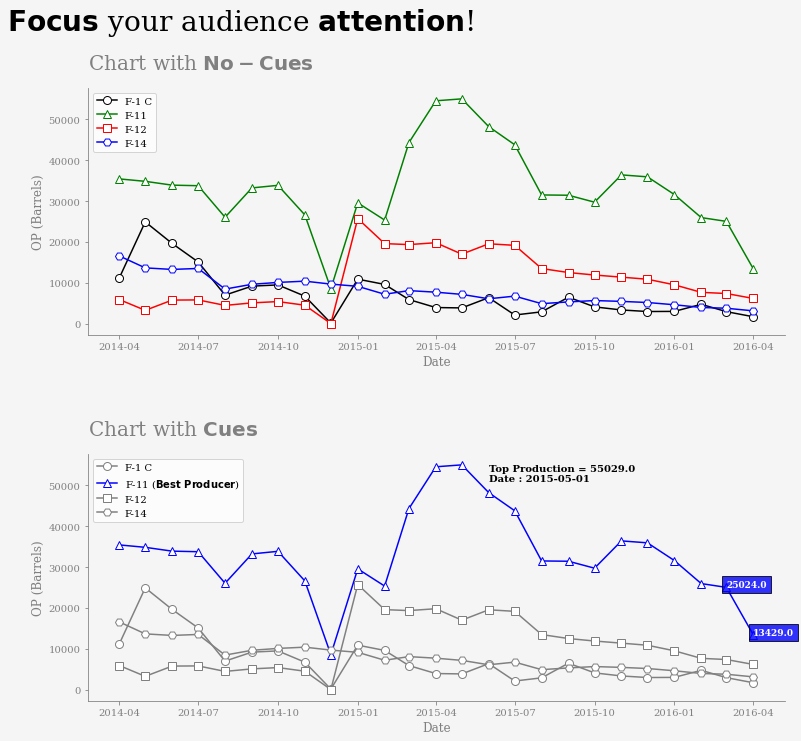

In [55]:
fig, axes= plt.subplots(figsize=(12, 12), nrows=2, ncols=1)

# No Attention Cues
axes[0].plot(well1.index ,well1.Oil, color = 'black',
             marker = 'o', markerfacecolor = 'white', markersize = 8,
             label = 'F-1 C')
axes[0].plot(well2.index ,well2.Oil, color = 'green', 
             marker = '^', markerfacecolor = 'white', markersize = 8,
             label = 'F-11')
axes[0].plot(well3.index ,well3.Oil, color = 'red',
             marker = 's', markerfacecolor = 'white', markersize = 8,
             label = 'F-12')
axes[0].plot(well4.index ,well4.Oil, color = 'blue', 
             marker = 'H', markerfacecolor = 'white', markersize = 8,
             label= 'F-14')

axes[0].legend(loc='upper left')
# Investigating the maximal production
mp_well_2=well2.loc[well2['Oil']==well2['Oil'].max()].index
mp_well_2=['2015-06-01']

# Graph two
axes[0].set_title('Chart with $\\bf{No-Cues}$', fontsize= 20, color='grey', y=1.05, loc='left')
axes[0].tick_params(axis='x', colors='grey')
axes[0].tick_params(axis='y', colors='grey')
axes[0].spines['left'].set_color('grey')
axes[0].spines['bottom'].set_color('grey')
axes[0].set_xlabel('Date', fontsize=12, color='grey')
axes[0].set_ylabel('OP (Barrels)', fontsize=12, color='grey')
#axes[1].text(mp_well_2, well2.Oil.max()-4000, s='Maximum Production = {}\nDate : {}'.format(well2.Oil.max(), '2015-05-01'), 
#            fontsize=10, color='black', fontweight='bold')
for s in ['top', 'right']:
    axes[0].spines[s].set_visible(False)

        
# let's jump to the second graph
# Figure with  Attention Cues
axes[1].plot(well1.index ,well1.Oil, color = 'grey',
             marker = 'o', markerfacecolor = 'white', markersize = 8,
             label = 'F-1 C')
axes[1].plot(well2.index ,well2.Oil, color = 'blue', 
             marker = '^', markerfacecolor = 'white', markersize = 8,
             label = 'F-11 ($\\bf{Best~Producer}$)')
axes[1].plot(well3.index ,well3.Oil, color = 'grey',
             marker = 's', markerfacecolor = 'white', markersize = 8,
             label = 'F-12')
axes[1].plot(well4.index ,well4.Oil, color = 'grey', 
             marker = 'H', markerfacecolor = 'white', markersize = 8,
             label= 'F-14')

axes[1].legend(loc='upper left')
# Investigating the maximal production
mp_well_2=well2.loc[well2['Oil']==well2['Oil'].max()].index
mp_well_2=['2015-06-01']

# Graph two
axes[1].set_title('Chart with $\\bf{Cues}$', fontsize= 20, color='grey', y=1.05, loc='left')
axes[1].tick_params(axis='x', colors='grey')
axes[1].tick_params(axis='y', colors='grey')
axes[1].spines['left'].set_color('grey')
axes[1].spines['bottom'].set_color('grey')
axes[1].set_xlabel('Date', fontsize=12, color='grey')
axes[1].set_ylabel('OP (Barrels)', fontsize=12, color='grey')
axes[1].text(mp_well_2, well2.Oil.max()-4000, s='Top Production = {}\nDate : {}'.format(well2.Oil.max(), '2015-05-01'), 
            fontsize=10, color='black', fontweight='bold')
for s in ['top', 'right']:
    axes[1].spines[s].set_visible(False)
    
    
# let's include labels for oil production values in the last year
y = list(well2.tail(2).Oil)
x = list(well2.tail(2).index)
n = list(well2.tail(2).Oil)

for i, txt in enumerate(n):
    axes[1].annotate(txt, (x[i], y[i]),fontsize=9,
                     ha = 'left', weight='bold', color='white',
                     Bbox = dict(facecolor = 'blue', alpha = .8))
    
    
#Set figure title
plt.suptitle("$\\bf{Focus}$ your audience $\\bf{attention}$!", 
             fontsize=28,x=0.3, y=.9, ha='center')

fig.patch.set_facecolor('#f6f5f5')
axes[0].patch.set_facecolor('#f6f5f5')
axes[1].patch.set_facecolor('#f6f5f5')
plt.tight_layout(pad=5.0)
plt.show()

In the graph above, **attention is drawn to the fact well F-11 has been the best oil producer since 2015 but production declines almost exponentially in the last two months**. By understanding, how our audience sees and processes information, we put ourselves in a better position to be able to communicate effectively.

### 3.2.5 Think like a designer
According to [Knaflic Cole](http://www.storytellingwithdata.com/book/downloads), four main topics that could help us design graphs in a better way include **affordances**, **aesthetics**, **accessibility**, and **acceptance**:

- In visual design, **affordances** are things we do to make it clear how to process what we show. This builds off of related things visually together, push less important elements to the background, and bring the critical stuff forward. Direct your audience’s attention intentionally to where you want them to look.
- Spending time on the **aesthetics** of your visuals can translate into people taking more time with your work or having the patience to overlook issues. Attention to detail comes into play: often many seemingly minor components add up to create a great or poor experience. To achieve the former, we must edit ruthlessly. 
- People are each different, and **accessibility** means recognizing this and working to create designs that are usable by people of diverse skills and abilities. We’ve touched on colorblindness, but that only scratches the surface. We’ll undertake exercises that will help you think about your designs more robustly. There is one simple thing that can help us improve the accessibility of our graphs broadly: using words wisely. 
- Finally, our visual designs only work if our audience **accepts** them and there are things we can do to make this more likely.

In a broader practical aspect, thinking like a designer involves the following:
* Highlighting important stuff
* Eliminating distractions
* Understanding what the audience wants to do with the data (function) and create a visualization (form) that allows for this
* Not overcomplicating, thus making your designs accessible to everyone
* Using text to label, introduce, explain, reinforce, highlight, recommend and ultimately...tell a story
* And making graphs aesthetically pleasing

Let's add-up these to our graph to se how it renders.

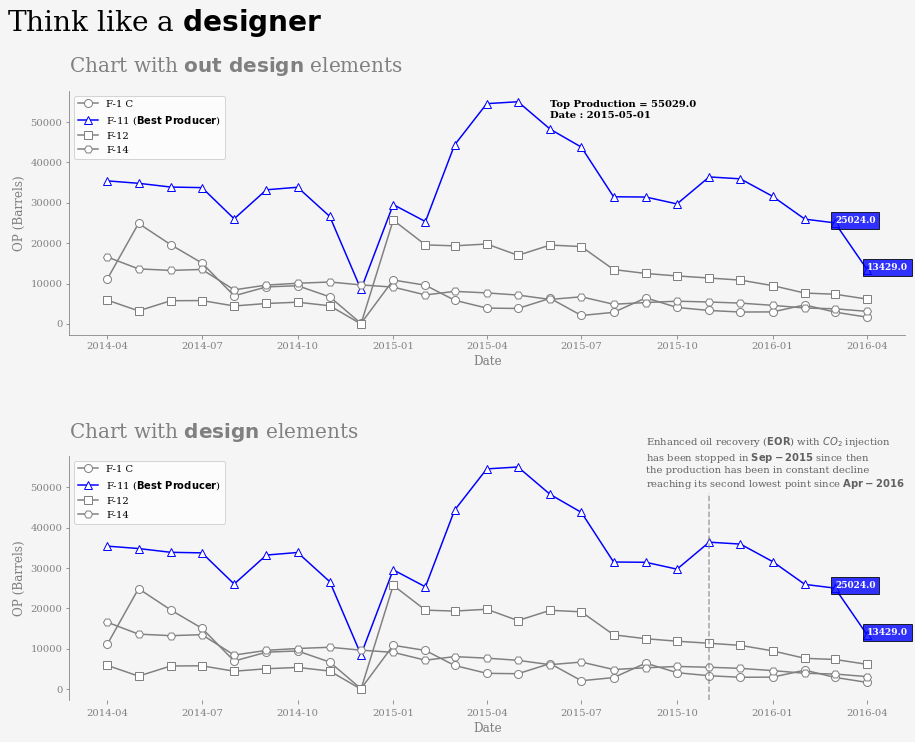

In [56]:
fig, axes= plt.subplots(figsize=(14, 12), nrows=2, ncols=1)
        
# Our last graph
axes[0].plot(well1.index ,well1.Oil, color = 'grey',
             marker = 'o', markerfacecolor = 'white', markersize = 8,
             label = 'F-1 C')
axes[0].plot(well2.index ,well2.Oil, color = 'blue', 
             marker = '^', markerfacecolor = 'white', markersize = 8,
             label = 'F-11 ($\\bf{Best~Producer}$)')
axes[0].plot(well3.index ,well3.Oil, color = 'grey',
             marker = 's', markerfacecolor = 'white', markersize = 8,
             label = 'F-12')
axes[0].plot(well4.index ,well4.Oil, color = 'grey', 
             marker = 'H', markerfacecolor = 'white', markersize = 8,
             label= 'F-14')

axes[0].legend(loc='upper left')
# Investigating the maximal production
mp_well_2=well2.loc[well2['Oil']==well2['Oil'].max()].index
mp_well_2=['2015-06-01']

axes[0].set_title('Chart with $\\bf{out~design}$ elements', fontsize= 20, color='grey', y=1.05, loc='left')
axes[0].tick_params(axis='x', colors='grey')
axes[0].tick_params(axis='y', colors='grey')
axes[0].spines['left'].set_color('grey')
axes[0].spines['bottom'].set_color('grey')
axes[0].set_xlabel('Date', fontsize=12, color='grey')
axes[0].set_ylabel('OP (Barrels)', fontsize=12, color='grey')
axes[0].text(mp_well_2, well2.Oil.max()-4000, s='Top Production = {}\nDate : {}'.format(well2.Oil.max(), '2015-05-01'), 
            fontsize=10, color='black', fontweight='bold')
for s in ['top', 'right']:
    axes[0].spines[s].set_visible(False)
    
# let's include labels for oil production values in the last year
y = list(well2.tail(2).Oil)
x = list(well2.tail(2).index)
n = list(well2.tail(2).Oil)

for i, txt in enumerate(n):
    axes[0].annotate(txt, (x[i], y[i]),fontsize=9,
                     ha = 'left', weight='bold', color='white',
                     Bbox = dict(facecolor = 'blue', alpha = .8))

    
    
# Think like a designed graph
        
# let's jump to the second graph
# Figure with  Attention Cues
axes[1].plot(well1.index ,well1.Oil, color = 'grey',
             marker = 'o', markerfacecolor = 'white', markersize = 8,
             label = 'F-1 C')
axes[1].plot(well2.index ,well2.Oil, color = 'blue', 
             marker = '^', markerfacecolor = 'white', markersize = 8,
             label = 'F-11 ($\\bf{Best~Producer}$)')
axes[1].plot(well3.index ,well3.Oil, color = 'grey',
             marker = 's', markerfacecolor = 'white', markersize = 8,
             label = 'F-12')
axes[1].plot(well4.index ,well4.Oil, color = 'grey', 
             marker = 'H', markerfacecolor = 'white', markersize = 8,
             label= 'F-14')

axes[1].legend(loc='upper left')
# Investigating the maximal production
mp_well_2=well2.loc[well2['Oil']==well2['Oil'].max()].index
mp_well_2=['2015-06-01']

# Graph two
axes[1].set_title('Chart with $\\bf{design}$ elements', fontsize= 20, color='grey', y=1.05, loc='left')
axes[1].tick_params(axis='x', colors='grey')
axes[1].tick_params(axis='y', colors='grey')
axes[1].spines['left'].set_color('grey')
axes[1].spines['bottom'].set_color('grey')
axes[1].set_xlabel('Date', fontsize=12, color='grey')
axes[1].set_ylabel('OP (Barrels)', fontsize=12, color='grey')
#axes[1].text(mp_well_2, well2.Oil.max()-4000, s='Top Production = {}\nDate : {}'.format(well2.Oil.max(), '2015-05-01'), 
#            fontsize=10, color='black', fontweight='bold')
axes[1].xaxis.set_tick_params(pad = 5)

for s in ['top', 'right', 'bottom']:
    axes[1].spines[s].set_visible(False)
    
    
# let's include labels for oil production values in the last year
y = list(well2.tail(2).Oil)
x = list(well2.tail(2).index)
n = list(well2.tail(2).Oil)

for i, txt in enumerate(n):
    axes[1].annotate(txt, (x[i], y[i]),fontsize=9,
                     ha = 'left', weight='bold', color='white',
                     Bbox = dict(facecolor = 'blue', alpha = .8))

# let's add some comments for clarity
axes[1].axvline(x=['2015-11-01'], ymin=0, ymax=0.85, 
            color='grey', alpha=0.7, linestyle='--' )

axes[1].annotate("Enhanced oil recovery ($\\bf{EOR}$) with $CO_2$ injection\nhas been stopped in $\\bf{Sep-2015}$ since then\nthe production has been in constant decline\nreaching its second lowest point since $\\bf{Apr-2016}$",
             xy=('2015-09-01',50000),color='#616161',fontsize=10)

#Set figure title
plt.suptitle("Think like a $\\bf{designer}$", 
             fontsize=28,x=0.2, y=.9, ha='center')

fig.patch.set_facecolor('#f6f5f5')
axes[0].patch.set_facecolor('#f6f5f5')
axes[1].patch.set_facecolor('#f6f5f5')
plt.tight_layout(pad=5.0)
plt.show()

Notice how the inclusion of this final comment serves to illustrate the exact point we originally wanted to make, namely "Our main producer is in critical decline since we stopped **EOR**, we now need to restart production using a tertiary recovery technique".

### 3.2.6 Tell a story
Telling naratives is how civilization came to remember great deal of insights, humans have become wired to the idea of good story, so in order to make our message impactfull and potentially able to drive action, we need to appeal to this fundamental aspect of human communication. The Author shares with us some critical tips on how to perform the latter, but I found myself that this specific part tends to be the most personal aspect and hence the most original. Either way, here are a couple of points to take into consideration.

#### 3.2.6.1 A narrative structure
Of course each story has to include a **beginning**, a **middle** and a conclusive **end**.
- In the beninging, in the beginining, in beee...  when **starting** you need to set a general context and introduce your audience to the case at hand, here are a couple of points illustrated by **Cliff Atkinson** in his book *Beyond Bullet Points*, that one should take into consideration when setting up a story: 
    - The setting: When and where does the story take place?
    - The main character: Who is driving the action? (This should be framed in terms of your audience!)
    - The imbalance: Why is it necessary, what has changed?
    - The balance: What do you want to see happen?
    - The solution: How will you bring about the changes?
    
    
- Once you’ve set the stage, so to speak, the bulk of your communication further develops “what could be,” with the goal of convincing your audience of the need for action. You retain your audience’s attention through this part of the story by addressing how they can solve the problem you introduced. You’ll work to convince them why they should accept the solution you are proposing or act in the way you want them to. Once again a couple of points to consider:
    - Further develop the situation or problem by covering relevant  background.
    - Incorporate external context or comparison points.
    - Give examples that illustrate the issue.
    - Include data that demonstrates the problem.
    - Articulate what will happen if no action is taken or no change is made.
    - Discuss potential options for addressing the problem.
    - Illustrate the benefits of your recommended solution.
    - Make it clear to your audience why they are in a unique position to make a decision or drive action.
    
    
- The **end**, Finally, the story must have an end. End with a call to action: make it totally clear to your audience what you want them to do with the new understanding or knowledge that you’ve imparted to them. One classic way to end a story is to tie it back to the beginning. 

#### 3.2.6.2 Final Points
- Be sure to consider the medium through which your story will be received. Of course, the style will be slightly different depending on whether it is a live presentation or a report. But the main idea is to keep it concise and clear.
- Create a sense of familiarity in your flow, which includes the colors and fonts used, the overall style. Change should be included only when necessary.
- Again, I've said this once before but I'll say it again. Be aware of your audience, they are the key to your message, boasting with complicated unclear graphics or hiding critical aspects that would have made it easier to understand has an absolute negative impact. Be clear!


Alright, this concludes this section. I'll show you how I generally set up my graphics for my freelancing projects. To gave you a taste how it's done. I'm positive it'll inspire you on finding your own custom style.

___

# 4. My personal visualization style
With time you learn to devolop your own style especially when it comes to visualization, to set my self from the crowed, I always to add a bit of a special touch and this is an example of the latter.

## 4.1 Case based color palette and font setting
When I say "case based", I mean that the colors you choose should match the project you are working on. To make it clear, if you're working on data that isn't exactly cheerful, such as deaths and illnesses, it's best not to use light colors and vice versa. In some cases, the subject matter is fairly neutral, so I just go with what best defines my client (based on their logo, website or whatever).

If you suck at colors like me, I suggest these website for inspiration [coolors](https://coolors.co/).

So we'll do the a data that is quite intresting in my opinion, it tackles [Oil Pipeline Accidents 2010-Present](https://www.kaggle.com/datasets/usdot/pipeline-accidents?datasetId=801&sortBy=voteCount) which I found in Kaggle, the latter has been collected and shared by [U.S DOT's Pipeline and Hazardous Materials Safety Administration](https://www7.transportation.gov/individuals/privacy/pia-pipeline-and-hazardous-materials-safety-administration-phmsa#:~:text=The%20Pipeline%20and%20Hazardous%20Materials%20Safety%20Administration%20%28PHMSA%29%2C,of%20hazardous%20materials%20by%20all%20modes%20of%20transportation.). 

**About the data:**
this database includes a record for each oil pipeline leak or spill reported to the Pipeline and Hazardous Materials Safety Administration since 2010. These records include the incident date and time, operator and pipeline, cause of incident, type of hazardous liquid and quantity lost, injuries and fatalities, and associated costs.

Alright, soooooooooooooooooooo... How do you pick a color for that? I mean, it's a little bad, but not as bad as an emotional shock thing, you know what I mean. So I'm going to go with something a little neutral with a serif font.

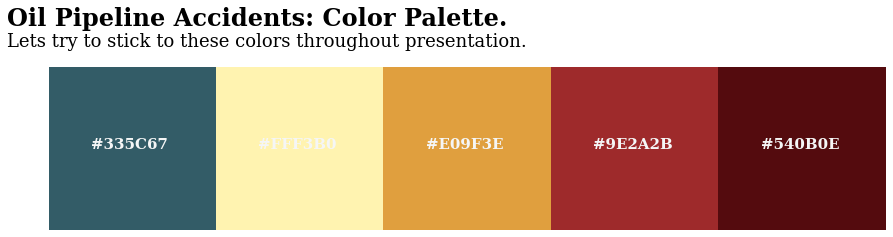

In [42]:
## color palette
colors = ['#335C67','#FFF3B0','#E09F3E','#9E2A2B', '#540B0E']
background_color = "#fbfbfb"
plt.rcParams['font.family'] = 'serif'

sns.palplot(colors, size = 3)
plt.text(-0.75,-0.75, 'Oil Pipeline Accidents: Color Palette.',{'size':24, 'weight':'black'})
plt.text(-0.75,-0.62, 'Lets try to stick to these colors throughout presentation.',{'size':18})
for idx,values in enumerate(colors):
    plt.text(idx-0.25,0, colors[idx],{'size':15, 'weight':'bold','color':'#f5f6f6'})
#plt.gcf().set_facecolor('#f5f6f6')
plt.box(None)
plt.axis('off')
plt.show()

<div style="background-color:#FF7F7F; padding:30px; font-size:18px">
    <strong>Remarks: 
    </strong> I'm not about to do a <strong> full </strong> analysis on the subject. This is just to demonstrate how I generally approach things, but don't worry we'll do full case studies later on.
   </div>

## 4.2 How I go about learning about the data
To decide the latter let's first look up the available parameters in the data base with a quick `.info` method.

In [43]:
df= pd.read_csv("Data\oil_spills.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2795 entries, 0 to 2794
Data columns (total 48 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Report Number                         2795 non-null   int64  
 1   Supplemental Number                   2795 non-null   int64  
 2   Accident Year                         2795 non-null   int64  
 3   Accident Date/Time                    2795 non-null   object 
 4   Operator ID                           2795 non-null   int64  
 5   Operator Name                         2795 non-null   object 
 6   Pipeline/Facility Name                2674 non-null   object 
 7   Pipeline Location                     2795 non-null   object 
 8   Pipeline Type                         2777 non-null   object 
 9   Liquid Type                           2795 non-null   object 
 10  Liquid Subtype                        1349 non-null   object 
 11  Liquid Name      

This is soooooooo intresting we've got pretty much everything, locations, fluid type, accidents, losses, costs. This is crazy, I'm quite chocked, you don't generally get this sort of comprehensive data, well lucky for us. But before we scream "Yay" too fast let's look up first Nan values.

In [44]:
# Seperate the variables to avoid clutter
df_1=df.iloc[:, 0:20]
df_2=df.iloc[:, 20:40]
df_3=df.iloc[:, 40:-1]

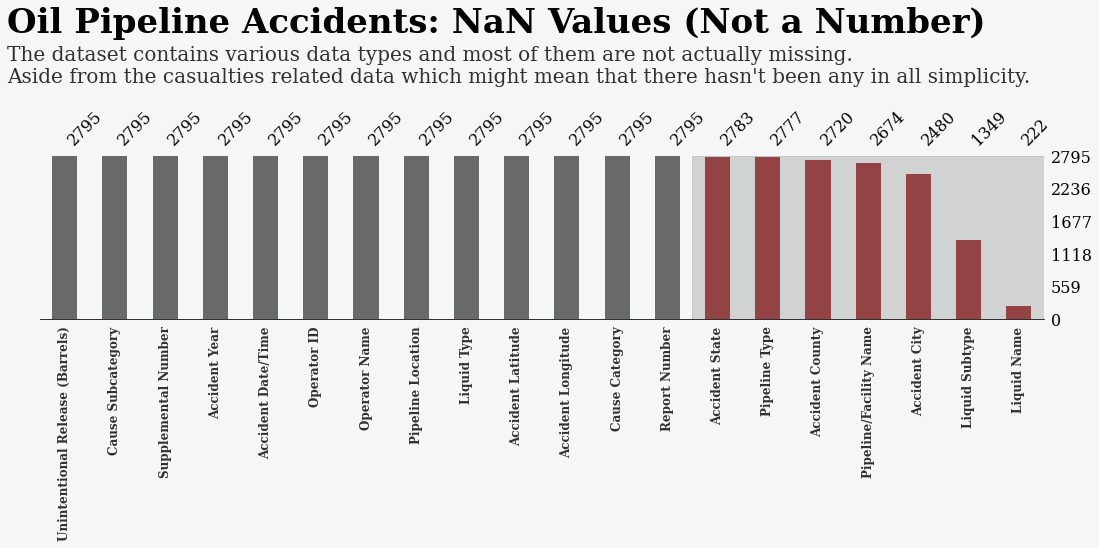

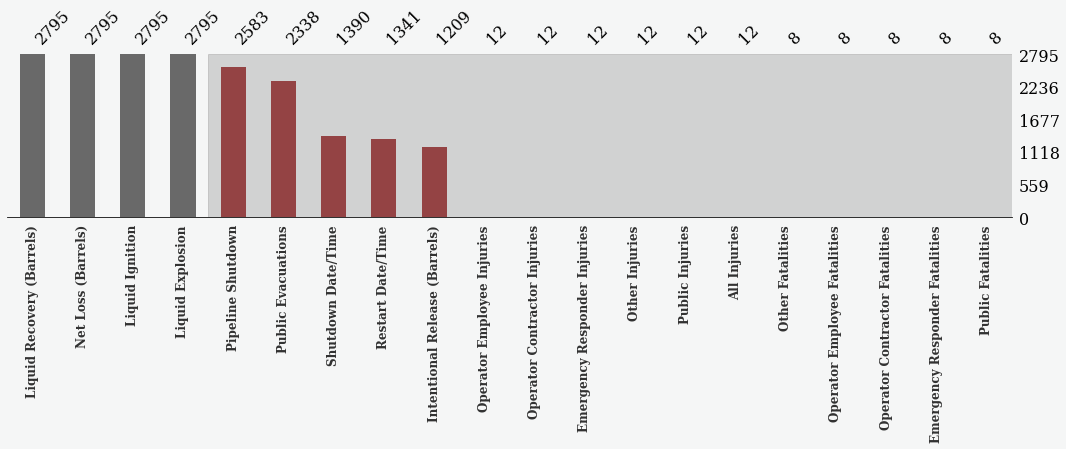

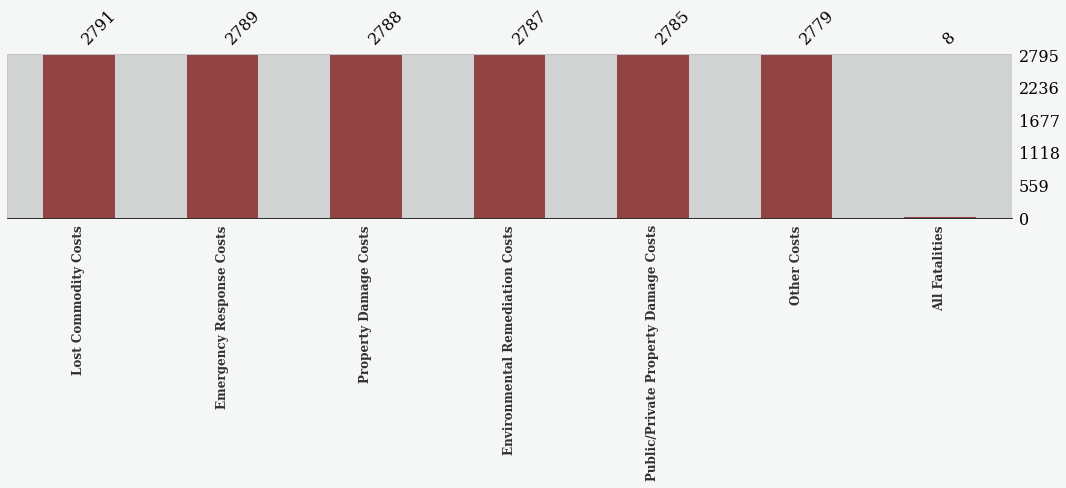

In [45]:
fig1, ax1 = plt.subplots(figsize = (18,3))
fig2, ax2 = plt.subplots(figsize = (18,3))
fig3, ax3 = plt.subplots(figsize = (18,3))

dfs=[df_1, df_2, df_3]
figs=[fig1, fig2, fig3]
axs=[ax1,ax2,ax3]

for dfr, ax, fig in zip(dfs, axs, figs):
    fig.patch.set_facecolor('#f5f6f6')
    ax.set_facecolor('#f5f6f6')
    color = [ colors[-2]  if (dfr[col].isnull().sum()) > 0 else 'dimgrey' for col in dfr.isnull().sum().sort_values().index ]

    #
    msno.bar(df = dfr, ax = ax,color=color, sort = 'descending')
    ax.axes.get_yaxis().set_visible(False)
    ax.set_xticklabels(ax.axes.get_xticklabels(), rotation = 90, 
                       **{'size':12,'weight':'bold','horizontalalignment': 'center'},alpha = 0.8)
    ax.spines['bottom'].set_visible(True)
 
    
fig1.text(.1,1.45,'Oil Pipeline Accidents: NaN Values (Not a Number)', {'size':34, 'weight':'bold'})
fig1.text(.1,1.22,'''The dataset contains various data types and most of them are not actually missing.
Aside from the casualties related data which might mean that there hasn't been any in all simplicity.''', {'size':20, 'weight':'normal'}, alpha = 0.8)

ax1.axvspan(xmin = 12.5, xmax = 20.5, color = 'grey',alpha = 0.3)
ax2.axvspan(xmin = 3.5, xmax = 20.5, color = 'grey',alpha = 0.3)
ax3.axvspan(xmin = -0.5, xmax = 7.5, color = 'grey',alpha = 0.3)


plt.tight_layout()
plt.show()

But honestly this is a lot, and could get overwhelming pretty fast, so last start simple alright.

So some basic questions might include:
- What is worst accident that accured in this period? What's the average cost of these accidents?
- How does damage cost varie across categories?
- What is the frequency of ('Liquid Type', 'Pipeline Type', 'Causes' and 'Locations' involved in these accidents)?
- What is the geographic distribution of these spills and the magnitude of their net losses?

### 4.1.1 What is worst accident that accured in this period? What's the average cost of these accidents?
Thinking about it simply, I believe the best way to communicate this through a graph is a simple text, which puts in contrast the magnitude of the biggest accident and the average of the remaining ones.
We can go about this in two ways, **Overall dommage costs** or **Human losses**. the latter don't have to be related, so we'll look at both since we luckly have both `All Costs` and `All Fatalities` variables.

In [46]:
# Let's look up the most costfull accident
max_cost=df.loc[df['All Costs']==df['All Costs'].max()]
avg_cost=round(df['All Costs'].mean()/1000000, 1)

In [47]:
# Let's look up the accident with most fatalities
max_fatal=df.loc[df['All Fatalities']==df['All Fatalities'].max()]

In [48]:
# Let's look up the accident with most injuries
max_inj=df.loc[df['All Injuries']==df['All Injuries'].max()]

<div style="background-color:#E09F3E; padding:30px; font-size:18px">
    <strong>Notice: 
    </strong> You see, see the one that cost the most isn't by neccisity the one with most casualties. Event <strong>20100181</strong> has cost the most, in the other hand, event <strong>20160391</strong> has both the highest number of fatalities and injuries.
   </div>

Okay, now it's time to create the visual for this question.

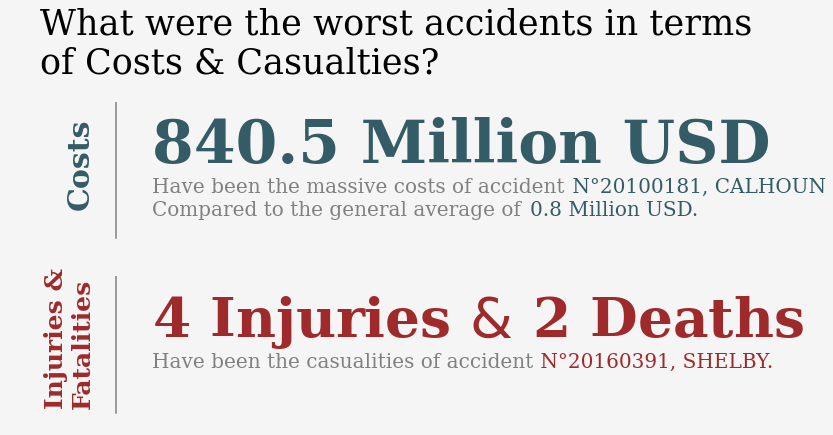

In [49]:
# Setting the plot
fig, axs= plt.subplots(figsize=(12, 6), nrows=2, ncols=1)
fig.patch.set_facecolor('#f6f5f5')

# The costs texts
axs[0].text(0.08,0.33, "Costs", fontsize= 30, color=colors[0], fontweight= 'black', rotation='vertical')
axs[0].text(0.2,0.6, "{} Million USD".format(round(max_cost['All Costs'].item()/1000000, 1)), 
        fontsize= 60, color=colors[0], fontweight= 'black')
axs[0].text(0.2,0.4, 'Have been the massive costs of accident ', fontsize= 20, color='grey')
axs[0].text(0.77,0.4, ' N°{}, {}'.format(max_cost['Report Number'].item(),max_cost['Accident County'].item()), fontsize= 20, color=colors[0])
axs[0].text(0.2,0.25, 'Compared to the general average of ', fontsize= 20, color='grey')
axs[0].text(0.72,0.25, '{} Million USD.'.format(avg_cost), fontsize= 20, color=colors[0])
for s in ['top', 'left', 'right', 'bottom']:
    axs[0].spines[s].set_visible(False)
axs[0].yaxis.set_ticks_position('none')
axs[0].xaxis.set_ticks_position('none')
axs[0].patch.set_facecolor('#f6f5f5')
axs[0].get_yaxis().set_visible(False)
axs[0].get_xaxis().set_visible(False)
axs[0].axvline(x = 0.15, ymin=0.1, ymax=8, color = 'grey')


# The injuries and fatalities
axs[1].text(0.05,0.16, """Injuries &
Fatalities""", fontsize= 25, color=colors[3], fontweight= 'black', rotation='vertical')
axs[1].text(0.2,0.6, "{} Injuries $&$ {} Deaths".format(int(max_inj['All Injuries'].item()), int(max_inj['All Fatalities'].item())), fontsize= 55, color=colors[3], fontweight= 'black')
axs[1].text(0.2,0.4, 'Have been the casualities of accident', fontsize= 20, color='grey')
axs[1].text(0.725,0.4, ' N°{}, {}.'.format(max_inj['Report Number'].item(),max_inj['Accident County'].item()), fontsize= 20, color=colors[3])

for s in ['top', 'left', 'right', 'bottom']:
    axs[1].spines[s].set_visible(False)
axs[1].yaxis.set_ticks_position('none')
axs[1].xaxis.set_ticks_position('none')
axs[1].patch.set_facecolor('#f6f5f5')
axs[1].get_yaxis().set_visible(False)
axs[1].get_xaxis().set_visible(False)
axs[1].axvline(x = 0.15, ymin=0.1, ymax=1, color = 'grey')



#Set figure title
plt.suptitle("""What were the worst accidents in terms
of Costs & Casualties? """, 
             fontsize=35,x=0.05, y=1, ha='left' )
plt.tight_layout()
plt.show()

Well it can surely be improved considerebly but this does the trick for now. Let's jump to the second question.

### 4.1.2 How does damage cost varie across categories?

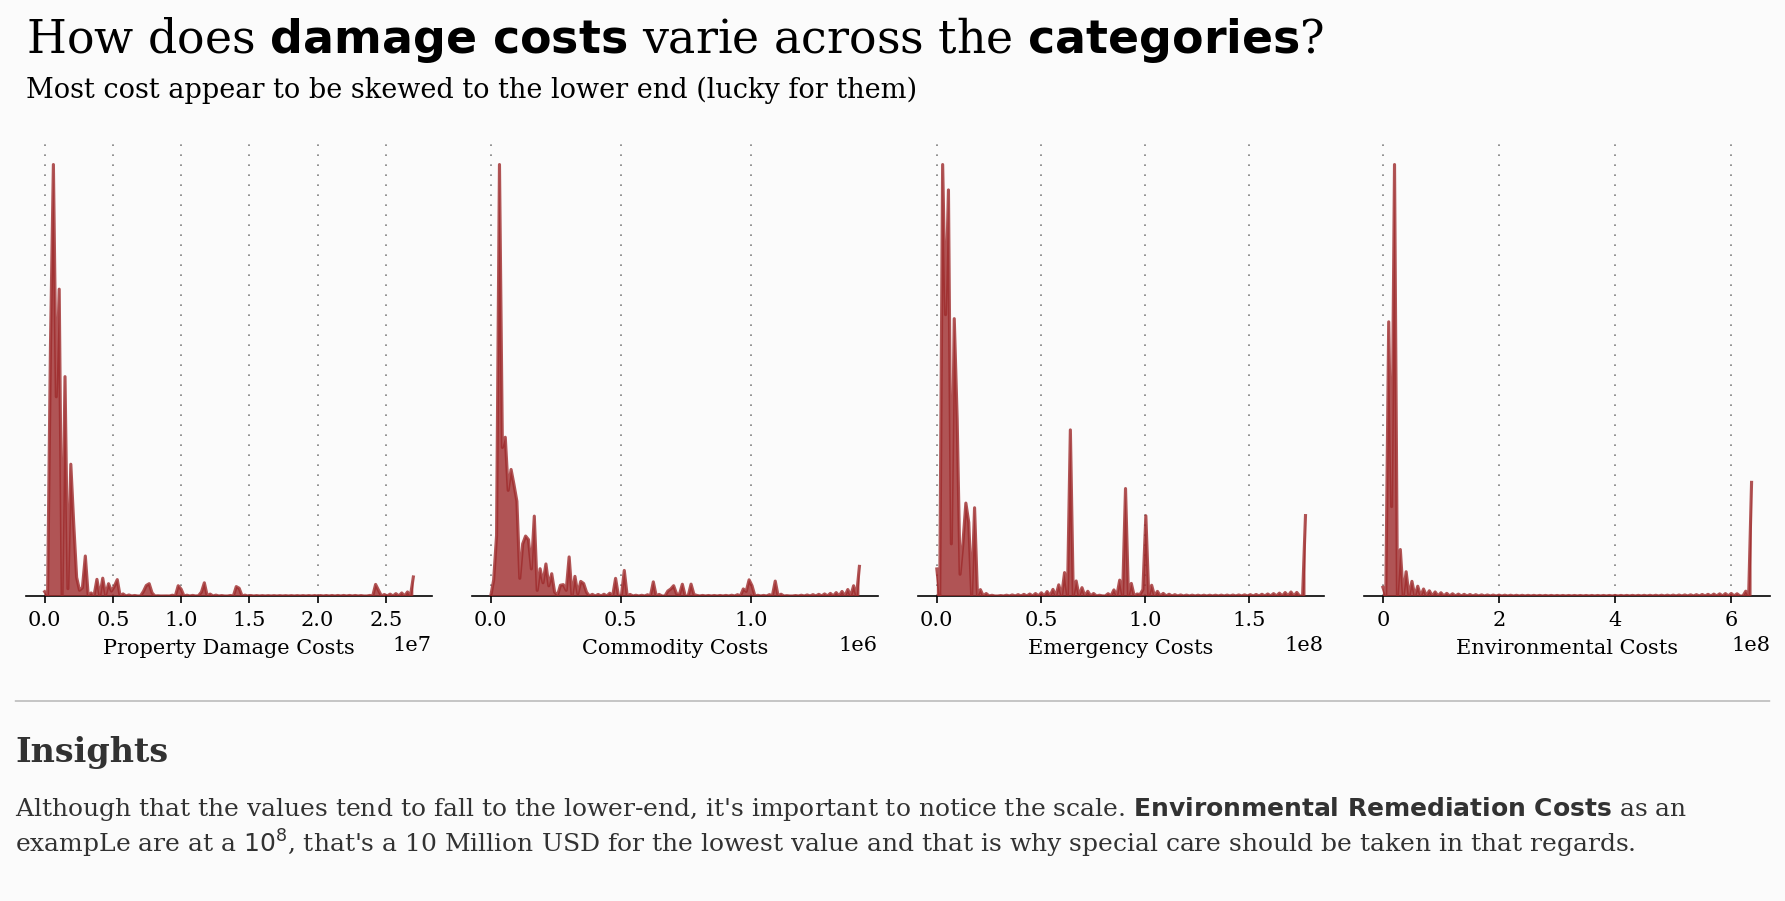

In [50]:
costs=['Property Damage Costs','Lost Commodity Costs',
       'Emergency Response Costs', 'Environmental Remediation Costs']
costs_labels=['Property Damage Costs','Commodity Costs',
       'Emergency Costs', 'Environmental Costs']
df_costs=df[costs]

fig = plt.figure(figsize=(15, 4), dpi=150,facecolor=background_color)
gs = fig.add_gridspec(1, 4)
gs.update(wspace=0.1, hspace=0.4)

# for plotting

run_no = 0
for row in range(0, 1):
    for col in range(0, 4):
        locals()["ax"+str(run_no)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(run_no)].set_facecolor(background_color)
        locals()["ax"+str(run_no)].tick_params(axis='y', left=False)
        locals()["ax"+str(run_no)].get_yaxis().set_visible(False)
        for s in ["top","right","left"]:
            locals()["ax"+str(run_no)].spines[s].set_visible(False)
        run_no += 1

run_no = 0
for variable, labl in zip(costs, costs_labels):
        sns.kdeplot(df_costs[variable] ,ax=locals()["ax"+str(run_no)], color='#9E2A2B', shade=True, linewidth=1.5, alpha=0.8, zorder=3, legend=False)
        locals()["ax"+str(run_no)].grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
        locals()["ax"+str(run_no)].set_xlabel(labl)
        run_no += 1   

Xstart, Xend = ax0.get_xlim()
Ystart, Yend = ax0.get_ylim()
ax0.text(Xstart, Yend+(Yend*0.2), 'How does $\\bf{damage~costs}$ varie across the $\\bf{categories}$?', fontsize=22)
ax0.text(Xstart, Yend+(Yend*0.1), 'Most cost appear to be skewed to the lower end (lucky for them)', fontsize=13, fontweight='light')

fig.text(.12, -.15
         , 'Insights', fontsize=16, fontweight='bold', fontfamily='serif',color='#323232')
fig.text(.12, -.35, '''
Although that the values tend to fall to the lower-end, it's important to notice the scale. $\\bf{Environmental~Remediation~Costs}$ as an 
exampLe are at a $10^8$, that's a 10 Million USD for the lowest value and that is why special care should be taken in that regards.
'''
         , fontsize=12, fontweight='light',color='#323232')

l1 = lines.Line2D([0.12, .9], [-0.05, -0.05], transform=fig.transFigure, figure=fig, color='black',lw=0.2)
fig.lines.extend([l1])  

plt.tight_layout()
plt.show()

### 4.1.3 What is the frequency of ('Liquid Type', 'Pipeline Type', 'Causes' and  'Locations' involved in these accidents)?
We're just going to look at the frequency of these, but there's a specific reason why I put them together, and that's because :
- Some fluids are more difficult to handle because of their chemical properties.
- Some pipelines are safely laid and not exposed to hostile conditions.
- Of course, causes are directly related to fluid-pipeline reactions.
- And some locations can certainly be more hostile than others with respect to the general environment.

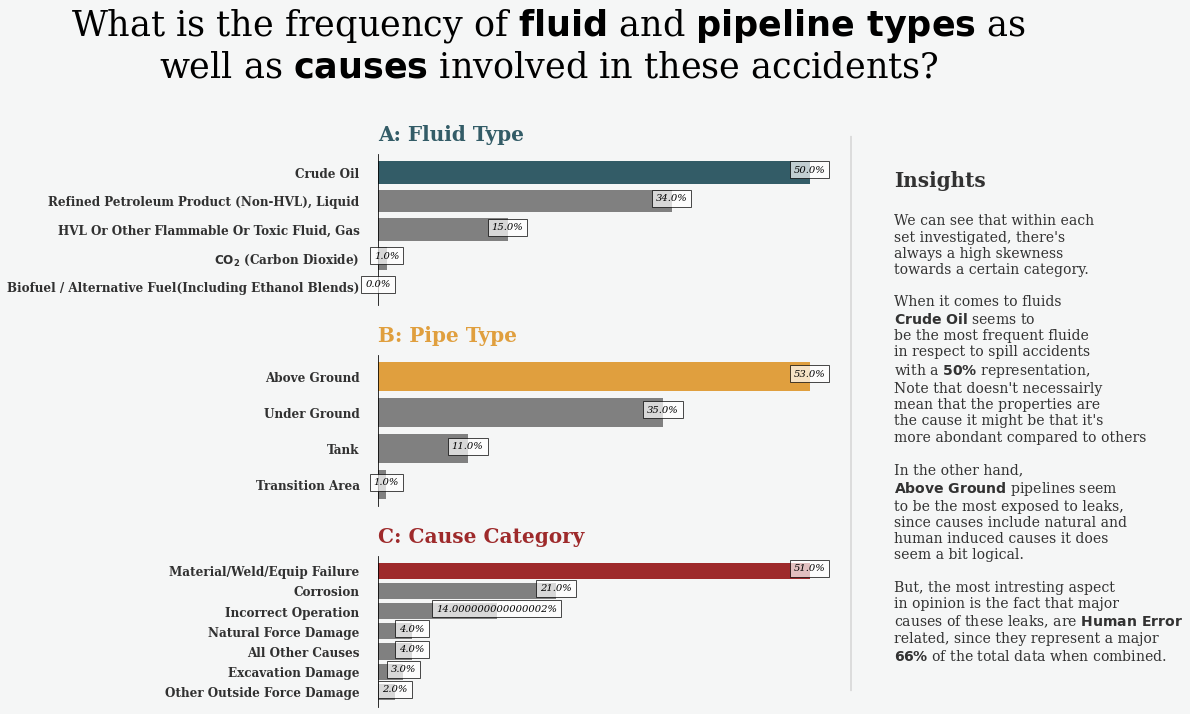

In [51]:
fluids_types=['Biofuel / Alternative Fuel(Including Ethanol Blends)',
              '$\\bf{CO_2}$ (Carbon Dioxide)','HVL Or Other Flammable Or Toxic Fluid, Gas',
              'Refined Petroleum Product (Non-HVL), Liquid', 'Crude Oil']
pipe_types=['Transition Area', 'Tank', 'Under Ground', 'Above Ground']
cause_cat=['Other Outside Force Damage','Excavation Damage', 'All Other Causes', 
           'Natural Force Damage', 'Incorrect Operation', 'Corrosion','Material/Weld/Equip Failure']

fluids_types_count=df['Liquid Type'].value_counts(normalize=True).round(2)
pipe_types_count=df['Pipeline Type'].value_counts(normalize=True).round(2)
cause_cat_count=df['Cause Category'].value_counts(normalize=True).round(2)


# function to add value labels
def addlabels(ax, labels,values):
    for i in range(len(labels)):
        ax.text(values[i], i ,str(values[i]*100)+"%", ha = 'center', fontsize=10, style='italic',
                 Bbox = dict(facecolor = 'white', alpha = .7))

# All combined
fig, axs=plt.subplots(figsize=(12,10), nrows=3, ncols=1)
fig.patch.set_facecolor('#f5f6f6')

datum=[fluids_types_count ,pipe_types_count, cause_cat_count]
labels=[fluids_types ,pipe_types, cause_cat]
clrs=[['grey', 'grey', 'grey', 'grey', '#335C67'],
    ['grey', 'grey', 'grey', '#E09F3E'],
    ['grey', 'grey', 'grey','grey', 'grey', 'grey', '#9E2A2B']]
spl_clr=['#335C67','#E09F3E','#9E2A2B']
titles=['A: Fluid Type', 'B: Pipe Type', 'C: Cause Category']

for ax, dt, labl, color, spl, ttl  in zip(axs, datum, labels, clrs, spl_clr, titles):
    ax.set_facecolor('#f5f6f6')
    ax.set_title(ttl, fontsize=20, y=1.05, color=spl, weight='bold', x=0, loc='left')
    ax.barh(labl, dt.sort_values(), color=color)
    # Setting the axis for clarity
    for s in ['top', 'bottom', 'right']:
        ax.spines[s].set_visible(False)
    ax.yaxis.set_ticks_position('none')
    ax.get_xaxis().set_visible(False)
    ax.yaxis.set_tick_params(pad = 15)
    ax.set_yticklabels(labl, 
                       **{'size':12,'weight':'bold'},alpha = 0.8)
    addlabels(ax, labl, dt.sort_values())

    
### line

fig.text(1.05, 0.75
         , 'Insights', fontsize=20, fontweight='bold', fontfamily='serif',color='#323232')
fig.text(1.05, 0.07, '''
We can see that within each
set investigated, there's
always a high skewness
towards a certain category.

When it comes to fluids
$\\bf{Crude~Oil}$ seems to
be the most frequent fluide
in respect to spill accidents
with a $\\bf{50\%}$ representation,
Note that doesn't necessairly
mean that the properties are
the cause it might be that it's
more abondant compared to others

In the other hand, 
$\\bf{Above~Ground}$ pipelines seem
to be the most exposed to leaks,
since causes include natural and
human induced causes it does 
seem a bit logical.

But, the most intresting aspect
in opinion is the fact that major
causes of these leaks, are $\\bf{Human~Error}$
related, since they represent a major
$\\bf{66\%}$ of the total data when combined.
'''
         , fontsize=14, fontweight='light',color='#323232')

l1 = lines.Line2D([1, 1], [0.05, 0.82], transform=fig.transFigure, figure=fig, color='black',lw=0.2)
fig.lines.extend([l1])  

#Set figure title
plt.suptitle("""What is the frequency of $\\bf{fluid}$ and $\\bf{pipeline~types}$ as 
well as $\\bf{causes}$ involved in these accidents?""", 
             fontsize=35,x=0.65, y=1., ha='center' )

plt.tight_layout(pad=2)
plt.show()

Alright, up to the next question.

### 4.1.4 What is the geographic distribution of these spills and the magnitude of their net losses?
Okay, let's take one last example, I want to quickly look at the geographic distribution of these spills, some areas might be more hostile than others. 
**Note** that it may be worth adding an additional layer of complexity being the season, as some could be a significant factor in pipeline failures, which could be due to heat-induced thermal expansion. The latter can also affect employee performance. So this type of information could help establish precautionary procedures for these periods, since we will be able to better estimate them.

For this specific example I'll use the Plotly lib to get some interactivity.

In [52]:
colors = ['#03071E',"#370617","#6A040F","#9D0208","#D00000","#DC2F02","#E85D04","#F48C06","#FFBA08"]
limits = [(0,100),(100,200),(200,300),(300,500),(500,1000),(1000,2000),(2000,5000),(5000,10000),(10000,36000)]
scale = 20
spills = []


for i in range(len(limits)):
    lim = limits[i]
    df_sub = df[((df['Net Loss (Barrels)']>lim[0]) & (df['Net Loss (Barrels)']<lim[1]))]
    spill = dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = df_sub['Accident Longitude'],
        lat = df_sub['Accident Latitude'],
        opacity=0.7,
        marker = dict(
            size = df_sub['Net Loss (Barrels)']/scale,
            color = colors[i],
            line = dict(width=0.5, color='rgb(40,40,40)'),
            sizemode = 'area'           
        ),
        name = '{0} - {1}'.format(lim[0],lim[1]) )
    spills.append(spill)
    

layout = dict(
        title = 'What is the geographic distribution of these spills and the magnitude of their net losses?',
        showlegend = True,
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showland = True,
            landcolor = 'silver',
            subunitwidth=1,
            countrywidth=1,
            subunitcolor="rgb(255, 255, 255)",
            countrycolor="rgb(255, 255, 255)",
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'
        ),
    )

fig = dict( data= spills, layout= layout )
iplot(fig)

Pretty cool and insightful this last one right! You can find all sorts of graphs on Plotly's website, But I suggest that you go easy on them, interactivity as I mentioned previously should be used when required.

<div style="background-color:#C0F5B0; padding:30px; font-size:18px">
Okay, I don't intend to do a full analysis on the subject, but I think we've moderately scratched the surface. I hope this has provided some general perspective on how to design graphics for <strong>informational</strong> purposes.
    </div>

___

**Congratulations** on completing this fifth notebook, remember you don't need to remember each one by heart. You can refer back to this notebook if you need to. The visuals are a lot of fun, but the creative aspect takes a little time, I recommend practicing until you get the feel for it.

Now that we have a good understanding of not only information extraction, but also effective visualization, we'll move on to the next phase of our course, which is *drum roll..........*, yes, machine learning and specifically supervised machine learning. So, see you soon ;)